In [1]:
cd ..

d:\min\research_projects\MedicalDataKit


In [2]:
import numpy as np
import pandas as pd
from MedDataKit.utils import column_check

# Zigong Heart Failure


In [111]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.clinical_dataset import ZigongHeartFailureDataset

dataset = ZigongHeartFailureDataset()
data = dataset.load_raw_data()
data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,DestinationDischarge,admission.ward,admission.way,occupation,discharge.department,visit.times,gender,body.temperature,pulse,respiration,...,Drug_24,Drug_25,outcome.during.hospitalization,death.within.28.days,death.within.3.months,death.within.6.months,re.admission.within.28.days,re.admission.within.3.months,re.admission.within.6.months,return.to.emergency.department.within.6.months
0,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1.0,Male,36.7,87.0,19.0,...,1.0,0.0,Alive,0,0,0,0,0,0,0.0
1,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1.0,Female,36.8,95.0,18.0,...,0.0,0.0,Alive,0,0,0,0,0,0,0.0
2,Home,Cardiology,NonEmergency,farmer,Cardiology,2.0,Male,36.5,98.0,18.0,...,0.0,0.0,Alive,0,0,0,0,0,0,0.0
3,Home,Cardiology,Emergency,UrbanResident,Cardiology,1.0,Male,36.0,73.0,19.0,...,0.0,0.0,Alive,0,0,0,1,1,1,1.0
4,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1.0,Female,35.0,88.0,19.0,...,0.0,0.0,Alive,0,0,0,0,0,0,0.0


In [112]:
print(data.columns.tolist())

['DestinationDischarge', 'admission.ward', 'admission.way', 'occupation', 'discharge.department', 'visit.times', 'gender', 'body.temperature', 'pulse', 'respiration', 'systolic.blood.pressure', 'diastolic.blood.pressure', 'map', 'weight', 'height', 'BMI', 'type.of.heart.failure', 'NYHA.cardiac.function.classification', 'Killip.grade', 'myocardial.infarction', 'congestive.heart.failure', 'peripheral.vascular.disease', 'cerebrovascular.disease', 'dementia', 'Chronic.obstructive.pulmonary.disease', 'connective.tissue.disease', 'peptic.ulcer.disease', 'diabetes', 'moderate.to.severe.chronic.kidney.disease', 'hemiplegia', 'leukemia', 'malignant.lymphoma', 'solid.tumor', 'liver.disease', 'AIDS', 'CCI.score', 'type.II.respiratory.failure', 'consciousness', 'eye.opening', 'verbal.response', 'movement', 'respiratory.support.', 'oxygen.inhalation', 'fio2', 'acute.renal.failure', 'LVEF', 'left.ventricular.end.diastolic.diameter.LV', 'mitral.valve.EMS', 'mitral.valve.AMS', 'EA', 'tricuspid.valve.r

In [102]:
dataset.show_dataset_info()

Dataset name: zigongheartfailure (2020) Subject Area: Medical
Dataset URL: https://physionet.org/content/heart-failure-zigong/1.3/
Dataset description: Hospitalized patients with heart failure: integrating electronic healthcare records and external outcome data
Dataset notes: EHR
Dataset data type: mixed
Number of rows: 2007, Number of columns: 190
Numerical features: (123): [ visit.times, body.temperature, pulse, respiration, systolic.blood.pressure, diastolic.blood.pressure, map, weight, height, BMI, CCI.score, fio2, LVEF, left.ventricular.end.diastolic.diameter.LV, mitral.valve.EMS, mitral.valve.AMS, EA, tricuspid.valve.return.velocity, tricuspid.valve.return.pressure, time.of.death..days.from.admission. ...... methemoglobin, hematocrit.blood.gas, reduced.hemoglobin, potassium.ion, chloride.ion, sodium.ion, glucose.blood.gas, lactate, measured.residual.base, measured.bicarbonate, carboxyhemoglobin, body.temperature.blood.gas, oxygen.saturation, partial.oxygen.pressure, oxyhemoglobin

In [109]:
print(dataset.get_task_names())
dataset.generate_ml_task_dataset(
    task_name = 'predict_death_90', 
    config = {'numerical_encoding': 'quantile', 'missing_strategy': 'impute', 'ordinal_as_numerical': True}, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
dataset.ml_task_dataset.data

['predict_outcome', 'predict_death_30', 'predict_death_90', 'predict_death_180', 'predict_readmission_30', 'predict_readmission_90', 'predict_readmission_180', 'predict_readmission_ed']
{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': True, 'categorical_encoding': 'ordinal', 'numerical_encoding': 'quantile', 'drop_unused_targets': True}
Raw data shape:  (2007, 190)
After setting target feature:  (2007, 183)
After feature engineering:  (2007, 183)
After handling missing data:  (1782, 163)
Final ml task dataset shape:  (1782, 161)
Task name: predict_death_90  Task type: classification
Target: death.within.3.months Num classes: 2
Data Shape: (1782, 161) (num 106 cat 54)
Missing ratio:  0.0%


,visit.times,body.temperature,pulse,respiration,systolic.blood.pressure,diastolic.blood.pressure,map,weight,height,BMI,...,Drug_17,Drug_18,Drug_19,Drug_20,Drug_21,Drug_22,Drug_23,Drug_24,Drug_25,death.within.3.months
0,0.000000,0.603614,0.518451,0.522152,0.388730,0.422520,0.387782,0.500724,0.571614,0.437314,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
1,0.000000,0.621560,0.548282,0.427427,0.576152,0.463685,0.514899,0.512948,0.567848,0.455943,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,0.668873,0.544622,0.561347,0.427427,0.388730,0.438801,0.401622,0.640454,0.640805,0.582424,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
3,0.000000,0.372584,0.451581,0.522152,0.418271,0.488997,0.449930,0.608946,0.640805,0.543149,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
4,0.000000,0.000000,0.522648,0.522152,0.515877,0.408496,0.449930,0.683621,0.481795,0.705211,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,0.000000,0.544622,0.572413,0.522152,0.565699,0.588697,0.588145,0.520124,0.460687,0.541123,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
2002,0.000000,0.417750,0.636046,0.658133,0.458049,0.526889,0.494689,0.306353,0.419648,0.310729,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2004,0.000000,0.621560,0.624291,0.522152,0.518205,0.646704,0.599402,0.674827,0.640805,0.611980,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2005,0.000000,0.513192,0.688441,0.522152,0.331127,0.481918,0.401622,0.369622,0.419648,0.408875,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


# MIMICII

In [87]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.clinical_dataset import MIMICIIDataset

dataset = MIMICIIDataset()
data = dataset.load_raw_data()
print(data.shape)
data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(1776, 46)


,aline_flg,age,gender_num,weight_first,bmi,sapsi_first,sofa_first,service_unit,service_num,day_icu_intime,...,chloride_first,bun_first,creatinine_first,po2_first,pco2_first,iv_day_1,hosp_exp_flg,icu_exp_flg,icu_los_day,hospital_los_day
0,1,72.36841,1.0,75.0,29.912791,15.0,9.0,SICU,1,Friday,...,109.0,41.0,1.6,196.0,39.0,2230.875000,1,0,7.63,13
1,0,64.92076,0.0,55.0,20.121312,NaN,5.0,MICU,0,Saturday,...,NaN,NaN,NaN,NaN,NaN,600.000000,0,0,1.14,1
2,0,36.50000,0.0,70.0,27.118272,16.0,5.0,MICU,0,Friday,...,101.0,16.0,0.8,298.0,30.0,2086.800293,0,0,2.86,5
3,1,44.49191,0.0,NaN,NaN,21.0,7.0,SICU,1,Saturday,...,100.0,16.0,0.5,146.0,23.0,NaN,1,1,0.58,3
4,1,23.74217,1.0,95.2,28.464563,18.0,7.0,SICU,1,Saturday,...,110.0,10.0,1.0,134.0,30.0,2358.244141,0,0,1.75,5


In [88]:
dataset.show_dataset_info()


Dataset name: mimicii (2008) Subject Area: Medical
Dataset URL: https://physionet.org/content/mimic2-iaccd/1.0/
Dataset description: Clinical data from the MIMIC-II database for a case study on indwelling arterial catheters
Dataset notes: MIMIC-II
Dataset data type: mixed
Number of rows: 1776, Number of columns: 46
Numerical features: (26): [ icu_los_day, age, weight_first, bmi, sapsi_first, sofa_first, day_icu_intime_num, hour_icu_intime, mort_day_censored, map_1st, hr_1st, temp_1st, spo2_1st, abg_count, wbc_first, hgb_first, platelet_first, sodium_first, potassium_first, tco2_first ...... day_icu_intime_num, hour_icu_intime, mort_day_censored, map_1st, hr_1st, temp_1st, spo2_1st, abg_count, wbc_first, hgb_first, platelet_first, sodium_first, potassium_first, tco2_first, chloride_first, bun_first, creatinine_first, po2_first, pco2_first, iv_day_1 ]
Ordinal features: []
Binary features: ['aline_flg', 'hospital_los_day', 'gender_num', 'service_num', 'hosp_exp_flg', 'icu_exp_flg', 'day_2

In [89]:
print(dataset.get_task_names())
dataset.generate_ml_task_dataset(
    task_name = 'predict_hosp_expire', 
    config = {'numerical_encoding': 'quantile', 'missing_strategy': 'impute', 'ordinal_as_numerical': True}, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
dataset.ml_task_dataset.data



['predict_hosp_expire', 'predict_icu_expire', 'predict_icu_los', 'predict_hospital_los']
{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': True, 'categorical_encoding': 'ordinal', 'numerical_encoding': 'quantile', 'drop_unused_targets': True}
Raw data shape:  (1776, 46)
After setting target feature:  (1776, 45)
After feature engineering:  (1776, 43)
After handling missing data:  (1683, 43)
Final ml task dataset shape:  (1683, 42)
Task name: predict_hosp_expire  Task type: classification
Target: hosp_exp_flg Num classes: 2
Data Shape: (1683, 42) (num 25 cat 16)
Missing ratio:  0.0%


,age,weight_first,bmi,sapsi_first,sofa_first,day_icu_intime_num,hour_icu_intime,map_1st,hr_1st,temp_1st,...,afib_flg,renal_flg,liver_flg,copd_flg,cad_flg,stroke_flg,mal_flg,resp_flg,hospital_los_day,hosp_exp_flg
0,0.564549,0.481795,0.576811,0.524264,0.624570,0.574025,0.472232,0.528776,0.493964,0.383626,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,0
2,0.429006,0.455109,0.478604,0.547872,0.470593,0.574025,0.436419,0.388965,0.717022,0.402836,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0,1
3,0.461639,0.517591,0.515999,0.653644,0.555684,1.000000,0.449930,0.575166,0.685255,0.612218,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,24.0,0
4,0.376265,0.588648,0.558271,0.589624,0.555684,1.000000,0.482776,0.594979,0.596165,0.402836,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0,1
5,0.429654,0.467288,0.438292,0.500845,0.470593,0.000000,0.518574,0.589438,0.512705,0.518328,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771,0.550309,0.489923,0.515999,0.570189,0.592841,0.000000,0.000000,0.600229,0.361617,0.413495,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,26.0,0
1772,0.564786,0.398937,0.515999,0.500845,0.470593,1.000000,1.000000,0.539051,0.285951,0.518328,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,35.0,0
1773,0.363323,0.446865,0.515999,0.547872,0.470593,0.462906,1.000000,0.569875,0.645178,0.627126,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,24.0,1
1774,0.500599,0.672304,0.515999,0.589624,0.624570,0.499035,0.380816,0.545160,0.420500,0.600854,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,17.0,1


# Myocardial Infarction


In [48]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.clinical_dataset import MIComplicationsDataset

dataset = MIComplicationsDataset()
data = dataset.load_raw_data()
data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,77.0,1,2.0,1,1.0,2.0,NaN,3.0,0.0,7,...,0,0,0,0,0,0,0,0,0,0
1,55.0,1,1.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,52.0,1,0.0,0,0.0,2.0,NaN,2.0,0.0,2,...,0,0,0,0,0,0,0,0,0,0
3,68.0,0,0.0,0,0.0,2.0,NaN,2.0,0.0,3,...,0,0,0,0,0,0,1,0,0,0
4,60.0,1,0.0,0,0.0,2.0,NaN,3.0,0.0,7,...,0,0,0,0,0,0,0,0,0,0


In [49]:
dataset.show_dataset_info()


Dataset name: micomplications (2024) Subject Area: Medical
Dataset URL: https://figshare.le.ac.uk/articles/dataset/Myocardial_infarction_complications_Database/12045261
Dataset description: Prediction of myocardial infarction complications from lancester medical center
Dataset notes: Clinical
Dataset data type: mixed
Number of rows: 1700, Number of columns: 123
Numerical features: (13): ['AGE', 'INF_ANAM', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'K_BLOOD', 'Na_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'L_BLOOD', 'ROE']
Ordinal features: ['STENOK_AN', 'DLIT_AG', 'TIME_B_S', 'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n']
Binary features: (88): [ SEX,IBS_NASL,nr11,nr01,nr02,nr03,nr04,nr07,nr08,np01,np04,np05,np07,np08,np09,np10,endocr01,endocr02,endocr03,zableg01 ...... LID_KB,NITR_S,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK

In [52]:
print(dataset.get_task_names())
dataset.generate_ml_task_dataset(
    task_name = 'predict_lethal', 
    config = {'numerical_encoding': 'quantile', 'missing_strategy': 'impute', 'ordinal_as_numerical': True}, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
dataset.ml_task_dataset.data


['predict_lethal', 'predict_lethal_binary', 'predict_heart_failure', 'predict_num_complications']
{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': True, 'categorical_encoding': 'ordinal', 'numerical_encoding': 'quantile', 'drop_unused_targets': True}
Raw data shape:  (1700, 123)
After setting target feature:  (1700, 112)
After feature engineering:  (1700, 112)
After handling missing data:  (1436, 105)
Final ml task dataset shape:  (1436, 104)
Task name: predict_lethal  Task type: classification
Target: LET_IS Num classes: 8
Data Shape: (1436, 104) (num 22 cat 81)
Missing ratio:  0.0%


,AGE,INF_ANAM,STENOK_AN,DLIT_AG,S_AD_ORIT,D_AD_ORIT,K_BLOOD,Na_BLOOD,ALT_BLOOD,AST_BLOOD,...,GIPER_Na,NITR_S,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,LET_IS
0,0.634746,0.637372,0.491302,1.000000,0.645936,0.614147,0.591314,0.541554,0.538136,0.530293,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0
1,0.445595,0.570821,0.000000,0.000000,0.422520,0.556973,0.390594,0.408496,0.481303,0.467032,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0
2,0.419648,0.000000,0.000000,0.477476,0.645936,0.614147,0.463555,0.408496,0.455244,0.394645,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0
3,0.556686,0.000000,0.000000,0.486686,0.422520,0.381593,0.448543,0.663504,0.603184,0.593613,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0
4,0.479826,0.000000,0.000000,1.000000,0.593033,0.556973,0.390594,0.408496,0.504345,0.488754,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691,0.496863,0.000000,0.000000,1.000000,0.539313,0.452945,0.615377,0.423186,0.373162,0.345485,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,6
1692,0.581556,0.000000,1.000000,1.000000,0.379240,0.381593,0.374305,0.423186,0.566004,0.488754,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,6
1693,0.571455,0.000000,0.511853,1.000000,0.539313,0.452945,0.505190,0.505190,0.566004,0.633154,...,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6
1694,0.634746,0.000000,0.000000,1.000000,0.566462,0.556973,0.448543,0.463685,0.424342,0.467032,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,6


# Diabetes Hospital


In [56]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.clinical_dataset import DiabeticHospitalDataset

dataset = DiabeticHospitalDataset()
data = dataset.load_raw_data()
data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1.0,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3.0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2.0,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2.0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [57]:
dataset.show_dataset_info()

Dataset name: diabetic_hospital (2014) Subject Area: Medical
Dataset URL: https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008?
Dataset description: The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks
Dataset notes: Diabetic Hospital Dataset
Dataset data type: mixed
Number of rows: 101766, Number of columns: 50
Numerical features: (8): ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
Ordinal features: ['age', 'weight']
Binary features: ['gender', 'acetohexamide', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']
Multiclass features: (32): [ encounter_id,patient_nbr,race,admission_type_id,discharge_disposition_id,admission_source_id,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult

In [74]:
print(dataset.get_task_names())
dataset.generate_ml_task_dataset(
    task_name = 'predict_readmission_30', 
    config = {'numerical_encoding': 'quantile', 'missing_strategy': 'impute', 'ordinal_as_numerical': True}, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
dataset.ml_task_dataset.data

['predict_readmission']
{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': True, 'categorical_encoding': 'ordinal', 'numerical_encoding': 'quantile', 'drop_unused_targets': True}
Raw data shape:  (101766, 50)
After setting target feature:  (101766, 50)
After feature engineering:  (101415, 34)
After handling missing data:  (99145, 31)
Final ml task dataset shape:  (99145, 31)
Task name: predict_readmission_30  Task type: classification
Target: readmitted_30_days Num classes: 2
Data Shape: (99145, 31) (num 6 cat 24)
Missing ratio:  0.0%


,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,encounter_id,race,gender,admission_type_id,...,insulin,glyburide-metformin,change,diabetesMed,medicare,medicaid,had_emergency,had_inpatient_days,had_outpatient_days,readmitted_30_days
0,0.000000,0.000000,0.482654,0.000000,0.000000,0.000000,46143.0,2.0,0.0,4.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.248842,0.474739,0.576814,0.000000,0.540892,0.565699,18359.0,2.0,0.0,0.0,...,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,0.293819,0.427106,0.370224,0.645936,0.476358,0.433844,85421.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0
3,0.333337,0.427106,0.500121,0.514533,0.516856,0.462125,80083.0,2.0,1.0,0.0,...,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
4,0.379240,0.000000,0.536574,0.000000,0.394645,0.398727,28525.0,2.0,1.0,0.0,...,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0.543016,0.474739,0.536574,0.000000,0.516856,0.565699,78223.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
101762,0.615874,0.542350,0.441437,0.591694,0.540892,0.565699,78224.0,0.0,0.0,0.0,...,2.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0
101763,0.543016,0.000000,0.545429,0.000000,0.412770,0.820557,78225.0,2.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0
101764,0.615874,0.643687,0.505795,0.557117,0.573055,0.565699,78226.0,2.0,0.0,1.0,...,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0


# Arrhythmia

In [3]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.repo_dataset import ArrhythmiaDataset

dataset = ArrhythmiaDataset()
data = dataset.load_raw_data()
data.head()

d:\min\research_projects\MedicalDataKit\data


,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS_angle,...,V6_Amp_Q,V6_Amp_R,V6_Amp_S,V6_Amp_R2,V6_Amp_S2,V6_Amp_P,V6_Amp_T,V6_Amp_QRSA,V6_Amp_QRSTA,Class
0,75.0,0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56.0,1,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54.0,0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55.0,0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75.0,0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [4]:
dataset.show_dataset_info()

Dataset name: arrhythmia (1997) Subject Area: Medical
Dataset URL: https://archive.ics.uci.edu/dataset/5/arrhythmia
Dataset description: Distinguish between the presence and absence of cardiac arrhythmia and classifyit in one of the 16 groups.
Dataset notes: Extracted from Signals
Dataset data type: None
Number of rows: 452, Number of columns: 280
Numerical features: (206): [ Age, Height, Weight, QRS duration, P-R interval, Q-T interval, T interval, P interval, QRS_angle, T_angle, P_angle, QRST_angle, J_angle, Heart rate, DI_Q, DI_R, DI_S, DI_R2, DI_S2, DI_num_deflections ...... V5_Amp_JJ, V5_Amp_Q, V5_Amp_R, V5_Amp_S, V5_Amp_R2, V5_Amp_S2, V5_Amp_P, V5_Amp_T, V5_Amp_QRSA, V5_Amp_QRSTA, V6_Amp_JJ, V6_Amp_Q, V6_Amp_R, V6_Amp_S, V6_Amp_R2, V6_Amp_S2, V6_Amp_P, V6_Amp_T, V6_Amp_QRSA, V6_Amp_QRSTA ]
Ordinal features: []
Binary features: (73): [ Sex,DI_Ragged_R,DI_Diphasic_R,DI_Ragged_P,DI_Diphasic_P,DI_Ragged_T,DI_Diphasic_T,DII_Ragged_R,DII_Diphasic_R,DII_Ragged_P,DII_Diphasic_P,DII_Ragge

In [16]:
print(dataset.get_task_names())
dataset.generate_ml_task_dataset(
    task_name = 'Class', 
    config = {'missing_strategy': 'impute', 'categorical_encoding': 'ordinal', 'numerical_encoding': 'quantile'}, 
    verbose = True
)

['Class']
{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': False, 'categorical_encoding': 'ordinal', 'numerical_encoding': 'quantile', 'drop_unused_targets': True}
Raw data shape:  (452, 280)
After setting target feature:  (452, 280)
After feature engineering:  (452, 280)
After handling missing data:  (420, 279)
Final ml task dataset shape:  (420, 259)


,Age,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS_angle,T_angle,...,V4_Ragged_T,V4_Diphasic_T,V5_Diphasic_R,V5_Diphasic_P,V5_Diphasic_T,V6_Ragged_R,V6_Diphasic_R,V6_Ragged_P,V6_Diphasic_T,Class
0,0.690384,0.741773,0.581593,0.537768,0.626449,0.512984,0.553559,0.658068,0.393323,0.426760,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.551888,0.515601,0.472294,0.449768,0.564322,0.612742,0.438528,0.250753,0.471093,0.486435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.543111,0.587521,0.673259,0.694650,0.527406,0.571332,0.580772,0.563963,0.673259,0.476171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.547288,0.613316,0.658068,0.608832,0.662690,0.543429,0.567598,0.688384,0.477651,0.419228,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
5,0.325263,0.547288,0.374231,0.608832,0.544707,0.337310,0.553559,0.500863,0.682828,0.572473,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,0.537768,0.454651,0.514728,0.438528,0.649787,0.552889,0.466239,0.641631,0.360049,0.397987,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
448,0.448112,0.741773,0.619916,0.608832,0.415059,0.475280,0.600510,0.404329,0.635151,0.572473,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
449,0.438528,0.529811,0.501151,0.645127,0.572092,0.494820,0.591967,0.635151,0.274615,0.360873,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
450,0.409387,0.380084,0.411605,0.555587,0.298128,0.571332,0.614476,0.337310,0.528005,0.466545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [17]:
dataset.ml_task_dataset.show_dataset_info()

Task name: Class  Task type: classification
Target: Class Num classes: 12
Data Shape: (420, 259) (num 197 cat 61)
Missing ratio:  0.0%


# Colposcopy


In [18]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.repo_dataset import ColposcopyDataset

dataset = ColposcopyDataset()
data = dataset.load_raw_data()
data.head()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,cervix_area,os_area,walls_area,speculum_area,artifacts_area,cervix_artifacts_area,os_artifacts_area,walls_artifacts_area,speculum_artifacts_area,cervix_specularities_area,...,dist_to_center_cervix,dist_to_center_os,class,experts::0,experts::1,experts::2,experts::3,experts::4,experts::5,consensus
0,0.344647,0.003080,0.047522,0.288216,0.178585,0.016564,0.0,0.043500,0.010149,0.000133,...,0.265933,0.346294,green,1.0,0.0,0.0,1.0,1.0,1.0,1.0
1,0.165329,0.000000,0.048236,0.504736,0.502783,0.007012,0.0,0.097405,0.973837,0.004055,...,1.000000,0.283059,green,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.457010,0.001681,0.242888,0.212859,0.000000,0.000000,0.0,0.000000,0.000000,0.001756,...,0.518740,0.419375,green,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.513244,0.005711,0.213781,0.251819,0.079795,0.000000,0.0,0.017594,0.007208,0.001288,...,0.347202,0.361672,green,1.0,1.0,0.0,1.0,1.0,1.0,1.0
4,0.390319,0.009454,0.272884,0.373487,0.000000,0.000000,0.0,0.000000,0.000000,0.000196,...,0.437852,0.673196,green,1.0,0.0,0.0,1.0,1.0,1.0,1.0


In [19]:
dataset.show_dataset_info()

Dataset name: colposcopy (2017) Subject Area: Medical
Dataset URL: https://archive.ics.uci.edu/dataset/384/quality+assessment+of+digital+colposcopies
Dataset description: This dataset explores the subjective quality assessment of digital colposcopies.
Dataset notes: Extracted from Signals
Dataset data type: None
Number of rows: 287, Number of columns: 70
Numerical features: (62): [ cervix_area, os_area, walls_area, speculum_area, artifacts_area, cervix_artifacts_area, os_artifacts_area, walls_artifacts_area, speculum_artifacts_area, cervix_specularities_area, os_specularities_area, walls_specularities_area, speculum_specularities_area, specularities_area, area_h_max_diff, rgb_cervix_r_mean, rgb_cervix_r_std, rgb_cervix_r_mean_minus_std, rgb_cervix_r_mean_plus_std, rgb_cervix_g_mean ...... hsv_cervix_s_std, hsv_cervix_v_mean, hsv_cervix_v_std, hsv_total_h_mean, hsv_total_h_std, hsv_total_s_mean, hsv_total_s_std, hsv_total_v_mean, hsv_total_v_std, fit_cervix_hull_rate, fit_cervix_hull_to

In [20]:
print(dataset.get_task_names())
dataset.generate_ml_task_dataset(
    task_name = 'expert_0_prediction', 
    config = {'numerical_encoding': 'quantile'}, 
    verbose = True
)
dataset.ml_task_dataset.data

['type_prediction', 'consensus_prediction', 'expert_0_prediction', 'expert_1_prediction', 'expert_2_prediction', 'expert_3_prediction', 'expert_4_prediction', 'expert_5_prediction']
{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': False, 'categorical_encoding': 'ordinal', 'numerical_encoding': 'quantile', 'drop_unused_targets': True}
Raw data shape:  (287, 70)
After setting target feature:  (287, 63)
After feature engineering:  (287, 63)
After handling missing data:  (287, 63)
Final ml task dataset shape:  (287, 63)


,cervix_area,os_area,walls_area,speculum_area,artifacts_area,cervix_artifacts_area,os_artifacts_area,walls_artifacts_area,speculum_artifacts_area,cervix_specularities_area,...,fit_cervix_bbox_rate,fit_cervix_bbox_total,fit_circle_rate,fit_circle_total,fit_ellipse_rate,fit_ellipse_total,fit_ellipse_goodness,dist_to_center_cervix,dist_to_center_os,experts::0
0,0.437758,0.429191,0.428081,0.529094,0.674288,0.528213,0.000000,0.589941,0.578794,0.367367,...,0.549273,0.430292,0.507593,0.442868,0.460115,0.438794,0.452640,0.406066,0.448795,0
1,0.329899,0.000000,0.429191,0.628399,1.000000,0.494941,0.000000,0.615243,1.000000,0.485618,...,0.352810,0.352810,0.369516,0.350030,0.377521,0.337420,0.525584,1.000000,0.392973,1
2,0.505059,0.394525,0.576459,0.490714,0.000000,0.000000,0.000000,0.000000,0.000000,0.432466,...,0.428081,0.522973,0.539885,0.495784,0.397549,0.514382,0.473542,0.536239,0.514382,0
3,0.534436,0.477027,0.562242,0.512679,0.577620,0.000000,0.000000,0.561206,0.570809,0.410059,...,0.563285,0.515235,0.524712,0.533538,0.467356,0.532644,0.437758,0.457342,0.459194,0
4,0.463761,0.556130,0.588644,0.574168,0.000000,0.000000,0.000000,0.000000,0.000000,0.373628,...,0.593934,0.443870,0.530864,0.464664,0.451686,0.464664,0.403311,0.500000,0.652881,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,0.574168,0.418824,0.596689,0.000000,0.510981,0.581176,0.000000,0.000000,0.000000,0.602451,...,0.367367,0.616991,0.448795,0.589941,0.392973,0.589941,0.540806,0.464664,0.452640,1
283,0.492407,0.488170,0.000000,0.000000,0.482199,0.558141,0.000000,0.000000,0.000000,0.516944,...,0.495784,0.483056,0.587363,0.476158,0.582386,0.477027,0.397549,0.542658,0.513530,1
284,0.600977,0.504216,0.533538,0.452640,0.492407,0.549273,0.607027,0.000000,0.000000,0.570809,...,0.527335,0.593934,0.404698,0.610217,0.611859,0.599526,0.588644,0.508439,0.607027,0
285,1.000000,0.000000,0.000000,0.000000,0.457342,0.490714,0.000000,0.000000,0.000000,0.441859,...,0.678834,1.000000,0.435137,1.000000,0.678834,1.000000,0.668123,1.000000,0.492829,1


In [21]:
dataset.ml_task_dataset.show_dataset_info()

Task name: expert_0_prediction  Task type: classification
Target: experts::0 Num classes: 2
Data Shape: (287, 63) (num 62 cat 0)
Missing ratio:  0.0%


# Z-Alizadeh sani

In [22]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.repo_dataset import ZAlizadehsaniDataset

dataset = ZAlizadehsaniDataset()
data = dataset.load_raw_data()
data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,LAD,LCX,RCA,Cath
0,53.0,90.0,175.0,Male,29.387755,0,1,1,0,0,...,39.0,52.0,261.0,50.0,0,N,Stenotic,Normal,Stenotic,CAD
1,67.0,70.0,157.0,Fmale,28.398718,0,1,0,0,0,...,38.0,55.0,165.0,40.0,4,N,Stenotic,Stenotic,Normal,CAD
2,54.0,54.0,164.0,Male,20.077335,0,0,1,0,0,...,38.0,60.0,230.0,40.0,2,mild,Stenotic,Normal,Normal,CAD
3,66.0,67.0,158.0,Fmale,26.838648,0,1,0,0,0,...,18.0,72.0,742.0,55.0,0,Severe,Normal,Normal,Normal,Normal
4,50.0,87.0,153.0,Fmale,37.165193,0,1,0,0,0,...,55.0,39.0,274.0,50.0,0,Severe,Normal,Normal,Normal,Normal


In [23]:
dataset.show_dataset_info()

Dataset name: zalizadehsani (2017) Subject Area: Medical
Dataset URL: https://archive.ics.uci.edu/dataset/411/extention+of+z+alizadeh+sani+dataset
Dataset description: Collections for CAD diagnosis.
Dataset notes: Extracted from Signals, CAD
Dataset data type: None
Number of rows: 303, Number of columns: 59
Numerical features: (21): [ Age, Weight, Length, BMI, BP, PR, FBS, CR, TG, LDL, HDL, BUN, ESR, HB, K, Na, WBC, Lymph, Neut, PLT ...... Weight, Length, BMI, BP, PR, FBS, CR, TG, LDL, HDL, BUN, ESR, HB, K, Na, WBC, Lymph, Neut, PLT, EF-TTE ]
Ordinal features: []
Binary features: (35): [ Sex,DM,HTN,Current Smoker,EX-Smoker,FH,Obesity,CRF,CVA,Airway disease,Thyroid Disease,CHF,DLP,Edema,Weak Peripheral Pulse,Lung rales,Systolic Murmur,Diastolic Murmur,Typical Chest Pain,Dyspnea ...... Lung rales,Systolic Murmur,Diastolic Murmur,Typical Chest Pain,Dyspnea,Function Class,Atypical,Nonanginal,Exertional CP,LowTH Ang,Q Wave,St Elevation,St Depression,Tinversion,LVH,Poor R Progression,LAD,LCX

In [24]:
print(dataset.get_task_names())
dataset.generate_ml_task_dataset(
    task_name = 'LAD', 
    config = {'numerical_encoding': 'quantile'}, 
    verbose = True
)
dataset.ml_task_dataset.data

['LAD', 'LCX', 'RCA', 'Cath']
{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': False, 'categorical_encoding': 'ordinal', 'numerical_encoding': 'quantile', 'drop_unused_targets': True}
Raw data shape:  (303, 59)
After setting target feature:  (303, 56)
After feature engineering:  (303, 56)
After handling missing data:  (303, 56)
Final ml task dataset shape:  (303, 55)


,Age,Weight,Length,BMI,BP,PR,FBS,CR,TG,LDL,...,Q Wave,St Elevation,St Depression,Tinversion,LVH,Poor R Progression,BBB,Region RWMA,VHD,LAD
0,0.454453,0.633344,0.603576,0.561398,0.401955,0.563864,0.451302,0.345992,0.624523,0.625452,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0
1,0.572592,0.472075,0.430553,0.533384,0.566374,0.563864,0.375477,0.490005,0.660062,0.560422,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4.0,1.0,0
2,0.461911,0.327499,0.486385,0.323353,0.338321,0.694569,0.415129,0.490005,0.468727,0.398537,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,0
3,0.562873,0.453109,0.435637,0.503992,0.338321,0.563864,0.352792,0.563864,0.327499,0.344536,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,1
4,0.425267,0.602866,0.388988,0.713388,0.401955,0.563864,0.519285,0.490005,0.556106,0.518065,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.500000,0.586055,0.525850,0.569447,0.338321,0.524611,0.468306,0.490005,0.484771,0.547792,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
299,0.472075,0.425267,0.373608,0.520508,0.338321,0.308425,0.420870,0.449020,0.481935,0.298805,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1
300,0.396424,0.532116,0.453109,0.572592,0.507190,0.452208,0.389761,0.490005,0.439578,0.534233,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1
301,0.494809,0.633344,0.440547,0.681150,0.338321,0.308425,0.490807,0.490005,0.494410,0.577462,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1


In [25]:
dataset.ml_task_dataset.show_dataset_info()

Task name: LAD  Task type: classification
Target: LAD Num classes: 2
Data Shape: (303, 55) (num 21 cat 33)
Missing ratio:  0.0%


# SPECTF


In [26]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.repo_dataset import SPECTFDataset

dataset = SPECTFDataset()
data = dataset.load_raw_data()
print(data.shape)
data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(267, 45)


,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,F5S,...,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S,Diagnosis
0,59.0,52.0,70.0,67.0,73.0,66.0,72.0,61.0,58.0,52.0,...,56.0,62.0,56.0,72.0,62.0,74.0,74.0,64.0,67.0,1
1,72.0,62.0,69.0,67.0,78.0,82.0,74.0,65.0,69.0,63.0,...,71.0,63.0,60.0,69.0,73.0,67.0,71.0,56.0,58.0,1
2,71.0,62.0,70.0,64.0,67.0,64.0,79.0,65.0,70.0,69.0,...,70.0,66.0,65.0,64.0,55.0,61.0,41.0,51.0,46.0,1
3,69.0,71.0,70.0,78.0,61.0,63.0,67.0,65.0,59.0,59.0,...,61.0,66.0,65.0,72.0,73.0,68.0,68.0,59.0,63.0,1
4,70.0,66.0,61.0,66.0,61.0,58.0,69.0,69.0,72.0,68.0,...,69.0,70.0,66.0,70.0,64.0,60.0,55.0,49.0,41.0,1


In [27]:
dataset.show_dataset_info()


Dataset name: spectf (2001) Subject Area: Medical
Dataset URL: https://archive.ics.uci.edu/dataset/96/spectf+heart
Dataset description: Data on cardiac Single Proton Emission Computed Tomography (SPECT) images.Each patient classified into two categories: normal and abnormal.
Dataset notes: Extracted from Signals
Dataset data type: numerical
Number of rows: 267, Number of columns: 45
Numerical features: (44): [ F1R, F1S, F2R, F2S, F3R, F3S, F4R, F4S, F5R, F5S, F6R, F6S, F7R, F7S, F8R, F8S, F9R, F9S, F10R, F10S ...... F13R, F13S, F14R, F14S, F15R, F15S, F16R, F16S, F17R, F17S, F18R, F18S, F19R, F19S, F20R, F20S, F21R, F21S, F22R, F22S ]
Ordinal features: []
Binary features: ['Diagnosis']
Multiclass features: []
Target features:
    - Diagnosis (binary) => ['1', '0']
Sensitive features: []
Drop features: []
Feature Distribution:
    - F1R        (float64) : NA:  0.0% -     39 values - [   23.00,    83.00] (   66.18,     8.25)
    - F1S        (float64) : NA:  0.0% -     43 values - [   21

In [28]:
print(dataset.get_task_names())
dataset.generate_ml_task_dataset(
    task_name = 'Diagnosis', 
    config = {'numerical_encoding': 'quantile'}, 
    verbose = True
)
dataset.ml_task_dataset.data

['Diagnosis']
{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': False, 'categorical_encoding': 'ordinal', 'numerical_encoding': 'quantile', 'drop_unused_targets': True}
Raw data shape:  (267, 45)
After setting target feature:  (267, 45)
After feature engineering:  (267, 45)
After handling missing data:  (267, 45)
Final ml task dataset shape:  (267, 45)


,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,F5S,...,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S,Diagnosis
0,0.401256,0.366609,0.511810,0.450297,0.603469,0.500000,0.501359,0.389813,0.405018,0.373387,...,0.395719,0.440718,0.393237,0.542085,0.450814,0.603469,0.616540,0.606763,0.668947,0
1,0.571864,0.451844,0.492743,0.450297,0.696176,0.757047,0.536665,0.413505,0.577375,0.486819,...,0.621410,0.454395,0.438510,0.495921,0.573674,0.503626,0.575511,0.502266,0.531836,0
2,0.557647,0.451844,0.511810,0.416848,0.518233,0.481306,0.673363,0.413505,0.597221,0.581843,...,0.594246,0.494560,0.490924,0.446635,0.405754,0.447689,0.387151,0.454395,0.443434,0
3,0.526616,0.562046,0.511810,0.629922,0.432843,0.468164,0.426326,0.413505,0.412824,0.446106,...,0.435137,0.494560,0.490924,0.542085,0.573674,0.515472,0.533757,0.538621,0.599515,0
4,0.541587,0.500000,0.378590,0.436833,0.432843,0.410753,0.457416,0.458413,0.633391,0.562046,...,0.568318,0.551786,0.499094,0.512267,0.465760,0.439618,0.428733,0.435705,0.418157,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,0.601076,0.535207,0.600292,0.488646,0.563730,0.637044,0.615602,0.611065,0.501359,0.541587,...,0.529928,0.454395,0.449258,0.527087,0.511810,0.491379,0.499094,0.481306,0.520545,1
263,0.571864,0.444508,0.417504,0.436833,0.473854,0.423250,0.443434,0.424489,0.719342,0.523802,...,0.471022,0.509986,0.575511,0.495921,0.511810,0.480844,0.601076,0.502266,0.476198,1
264,0.617490,0.580549,0.544593,0.608457,0.532795,0.514097,0.586495,0.525207,0.533276,0.510442,...,0.529928,0.586495,0.575511,0.683485,0.605927,0.661053,0.637044,0.664861,0.757047,1
265,0.401256,0.451844,0.544593,0.552837,0.502266,0.500000,0.536665,0.587862,0.466243,0.541587,...,0.621410,0.509986,0.535207,0.635805,0.692679,0.661053,0.661053,0.704068,0.725945,1


In [29]:
dataset.ml_task_dataset.show_dataset_info()

Task name: Diagnosis  Task type: classification
Target: Diagnosis Num classes: 2
Data Shape: (267, 45) (num 44 cat 0)
Missing ratio:  0.0%


# Nasarian CAD


In [30]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.kaggle_dataset import NasarianCADDataset

dataset = NasarianCADDataset()
data = dataset.load_raw_data()
print(data.shape)
data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
C:\Users\sitao\.kaggle\kaggle.json
Dataset URL: https://www.kaggle.com/datasets/elhamnasarian/nasarian-cad-dataset
d:\min\research_projects\MedicalDataKit\data\nasariancad\nasarian-cad-dataset.zip
(150, 50)


,Age,Weight,Length,BMI,DM,HTN,FAMILYHTN,CurrentSmoker,EXSmoker,FH,...,RBC,HB,POLY,WBC,Lymph,eo,PLT,HTC,angiographyCAD,heartattack
0,59.0,75.0,177.0,23.93,2,1,2,1,2,1,...,4.12,11.9,51.0,7700.0,42.0,0,287.0,36.0,2,1
1,48.0,82.0,185.0,27.39,1,1,1,1,2,2,...,3.88,16.1,59.0,7500.0,40.0,1,244.0,41.0,2,1
2,51.0,95.0,174.0,31.02,1,1,1,1,1,1,...,5.04,12.5,60.0,6500.0,44.0,0,325.0,40.0,1,1
3,55.0,70.0,172.0,24.80,1,1,1,1,1,1,...,4.16,13.0,57.0,6000.0,45.0,1,203.0,39.0,2,1
4,51.0,104.0,167.0,37.29,2,2,1,1,1,1,...,4.40,13.3,50.0,6000.0,52.0,1,237.0,40.0,1,1


In [31]:
dataset.show_dataset_info()


Dataset name: nasariancad (2022) Subject Area: Medical
Dataset URL: https://www.kaggle.com/datasets/elhamnasarian/nasarian-cad-dataset
Dataset description: First Heart Disease Dataset with Occupational Risk Factors + Clinical Features
Dataset notes: CAD
Dataset data type: mixed
Number of rows: 150, Number of columns: 50
Numerical features: (19): ['Age', 'Weight', 'Length', 'BMI', 'BP', 'PR', 'CR', 'TG', 'LDL', 'HDL', 'BUN', 'RBC', 'HB', 'POLY', 'WBC', 'PLT', 'HTC', 'Lymph', 'FBS']
Ordinal features: []
Binary features: (29): [ heartattack,DM,HTN,FAMILYHTN,CurrentSmoker,EXSmoker,FH,Obesity,CHAGHISHEKAMI,CRF,CVA,Airwaydisease,ThyroidDisease,HLP,STRESS,noise,shiftwork,Edema,WeakPeripheralPulse,SystolicMurmur ...... CRF,CVA,Airwaydisease,ThyroidDisease,HLP,STRESS,noise,shiftwork,Edema,WeakPeripheralPulse,SystolicMurmur,DiastolicMurmur, ChestPain,Dyspnea,heartbeat,syanoz,Function,exercisetest,arytmi,angiographyCAD ]
Multiclass features: ['eo', 'Lungrales']
Target features:
    - angiographyC

In [32]:
print(dataset.get_task_names())
dataset.generate_ml_task_dataset(
    task_name = 'predict_heartattack', 
    config = {'numerical_encoding': 'quantile'}, 
    verbose = True
)
dataset.ml_task_dataset.data

['predict_cad', 'predict_heartattack']
{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': False, 'categorical_encoding': 'ordinal', 'numerical_encoding': 'quantile', 'drop_unused_targets': True}
Raw data shape:  (150, 50)
For this dataset, drop_unused_targets True is considered as False. No target features will be dropped.
After setting target feature:  (150, 50)
After feature engineering:  (150, 50)
After handling missing data:  (150, 50)
Final ml task dataset shape:  (150, 50)


,Age,Weight,Length,BMI,BP,PR,FBS,CR,TG,LDL,...,ChestPain,Dyspnea,heartbeat,syanoz,Function,exercisetest,arytmi,eo,angiographyCAD,heartattack
0,0.590064,0.448266,0.611017,0.393580,0.504855,0.529580,0.425129,0.452882,0.539067,0.424029,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
1,0.367353,0.486201,0.704387,0.471267,0.399356,0.529580,0.537316,0.000000,0.619301,0.491901,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
2,0.435644,0.593898,0.559381,0.568463,0.540830,0.529580,0.425129,0.452882,0.495954,0.456498,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.514616,0.406102,0.527889,0.419525,0.399356,0.457392,0.456498,0.388983,0.484565,0.603485,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0
4,0.435644,0.661066,0.437654,0.697235,0.559381,0.424029,0.445439,0.512166,0.466149,0.519547,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.565372,0.287112,0.403461,0.345166,0.504855,0.358415,0.487018,0.568463,0.622875,0.583579,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
146,0.636968,0.262244,0.473794,0.287112,0.646554,0.529580,0.425129,0.512166,0.429436,0.548950,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
147,0.636968,0.419525,0.437654,0.430491,0.467865,0.403461,0.549874,0.512166,0.563348,0.512982,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0
148,0.636968,0.523696,0.543502,0.508911,0.532135,0.457392,0.508099,0.512166,0.606420,0.626628,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [33]:
dataset.ml_task_dataset.show_dataset_info()

Task name: predict_heartattack  Task type: classification
Target: heartattack Num classes: 2
Data Shape: (150, 50) (num 19 cat 30)
Missing ratio:  0.0%


# Fetal CTG

In [70]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.kaggle_dataset import FetalCTGDataset

dataset = FetalCTGDataset()
data = dataset.load_raw_data()
print(data.shape)
data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
C:\Users\sitao\.kaggle\kaggle.json
Dataset URL: https://www.kaggle.com/datasets/akshat0007/fetalhr
d:\min\research_projects\MedicalDataKit\data\fetalcad\fetalhr.zip
(2126, 37)


,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,240.0,357.0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,5.0,632.0,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,177.0,779.0,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [71]:
dataset.show_dataset_info()


Dataset name: fetalcad (2019) Subject Area: Medical
Dataset URL: https://www.kaggle.com/datasets/akshat0007/fetalhr
Dataset description: This dataset explores the subjective quality assessment of digital colposcopies.
Dataset notes: Extracted from Signals, CAD
Dataset data type: None
Number of rows: 2126, Number of columns: 37
Numerical features: (25): [ b, e, LBE, LB, AC, FM, UC, ASTV, MSTV, ALTV, MLTV, DL, DS, DP, DR, Width, Min, Max, Nmax, Nzeros ...... FM, UC, ASTV, MSTV, ALTV, MLTV, DL, DS, DP, DR, Width, Min, Max, Nmax, Nzeros, Mode, Mean, Median, Variance, Tendency ]
Ordinal features: []
Binary features: ['A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP']
Multiclass features: ['CLASS', 'NSP']
Target features:
    - A (binary) => ['0.0', '1.0']
    - B (binary) => ['0.0', '1.0']
    - C (binary) => ['0.0', '1.0']
    - D (binary) => ['0.0', '1.0']
    - E (binary) => ['0.0', '1.0']
    - AD (binary) => ['0.0', '1.0']
    - DE (binary) => ['0.0', '1.0']
    - LD (binary) => 

In [72]:
dataset.get_task_names()


['predict_pattern_A',
 'predict_pattern_B',
 'predict_pattern_C',
 'predict_pattern_D',
 'predict_pattern_E',
 'predict_pattern_AD',
 'predict_pattern_DE',
 'predict_pattern_LD',
 'predict_pattern_FS',
 'predict_pattern_SUSP',
 'predict_pattern_CLASS',
 'predict_pattern_NSP']

In [73]:
dataset.generate_ml_task_dataset(
    task_name = 'predict_pattern_CLASS', 
    config = {'numerical_encoding': 'quantile'}, 
    verbose = True
)
dataset.ml_task_dataset.data


{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': False, 'categorical_encoding': 'ordinal', 'numerical_encoding': 'quantile', 'drop_unused_targets': True}
Raw data shape:  (2126, 37)
After setting target feature:  (2126, 26)
After feature engineering:  (2126, 26)
After handling missing data:  (2126, 26)
Final ml task dataset shape:  (2126, 25)


,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS
0,0.460818,0.234100,0.359896,0.359896,0.000000,0.000000,0.000000,0.647481,0.398727,0.634105,...,0.414754,0.248842,0.448543,0.000000,0.377901,0.507246,0.381850,0.651521,1.000000,0
1,0.402634,0.354987,0.487052,0.487052,0.556399,0.000000,0.519805,0.295005,0.595768,0.000000,...,0.442595,0.662994,0.567385,0.599814,0.509547,0.501207,0.504345,0.527516,0.460293,1
2,0.452128,0.398517,0.499155,0.499155,0.517346,0.000000,0.550762,0.278086,0.595768,0.000000,...,0.442595,0.662994,0.542616,0.599814,0.509547,0.494326,0.492149,0.531309,0.460293,1
3,0.482409,0.475861,0.510517,0.510517,0.517346,0.000000,0.581902,0.278086,0.619184,0.000000,...,0.367472,0.539444,0.687625,0.000000,0.490211,0.487660,0.485101,0.531309,1.000000,1
4,0.498914,0.455915,0.487052,0.487052,0.556399,0.000000,0.550762,0.278086,0.619184,0.000000,...,0.367472,0.539444,0.641158,0.000000,0.490211,0.501207,0.492149,0.522648,1.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,0.600232,0.594391,0.560462,0.560462,0.000000,0.000000,0.581902,0.701614,0.000000,0.597567,...,0.650281,0.573539,0.514899,0.000000,0.602117,0.601273,0.597164,0.433231,0.460293,8
2122,0.568468,0.594391,0.560462,0.560462,0.494205,0.000000,0.663504,0.686822,0.370821,0.593033,...,0.517714,0.534250,0.567385,0.000000,0.595966,0.585964,0.588697,0.455109,1.000000,8
2123,0.568468,0.575537,0.560462,0.560462,0.494205,0.000000,0.611506,0.701614,0.370821,0.587595,...,0.517714,0.539444,0.542616,0.000000,0.602117,0.585964,0.597164,0.471603,1.000000,8
2124,0.568468,0.606017,0.560462,0.560462,0.494205,0.000000,0.663504,0.686822,0.370821,0.600854,...,0.517714,0.534250,0.567385,0.000000,0.595966,0.577313,0.588697,0.471603,1.000000,8


# HCT Survival


In [58]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.clinical_dataset import CIBMTRHCTSurvivalDataset

dataset = CIBMTRHCTSurvivalDataset()
data = dataset.load_raw_data()
data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
C:\Users\sitao\.kaggle\kaggle.json
equity-post-HCT-survival-predictions.zip: Skipping, found more recently modified local copy (use --force to force download)
d:\min\research_projects\MedicalDataKit\data\cibmtr_hct_survival\equity-post-HCT-survival-predictions.zip


,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,graft_type,...,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,Bone marrow,...,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,Peripheral blood,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672
2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,Bone marrow,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793
3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,Bone marrow,...,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,102.349
4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,Peripheral blood,...,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223


In [62]:
dataset.show_dataset_info()

Dataset name: cibmtr_hct_survival (2017) Subject Area: Medical
Dataset URL: https://www.kaggle.com/competitions/equity-post-HCT-survival-predictions/data
Dataset description: The dataset consists of 59 variables related to hematopoietic stem cell transplantation (HSCT)encompassing a range of demographic and medical characteristics of both recipients and donors, such as age, sex, ethnicity, disease status, and treatment details. 
Dataset notes: HSCT, Survival Prediction
Dataset data type: None
Number of rows: 28800, Number of columns: 59
Numerical features: (23): [ hla_match_c_high, hla_high_res_8, hla_low_res_6, hla_high_res_6, hla_high_res_10, hla_match_dqb1_high, hla_nmdp_6, hla_match_c_low, hla_match_drb1_low, hla_match_dqb1_low, year_hct, hla_match_a_high, donor_age, hla_match_b_low, age_at_hct, hla_match_a_low, hla_match_b_high, comorbidity_score, karnofsky_score, hla_low_res_8 ...... hla_high_res_6, hla_high_res_10, hla_match_dqb1_high, hla_nmdp_6, hla_match_c_low, hla_match_drb1

In [71]:
print(dataset.get_task_names())
dataset.generate_ml_task_dataset(
    task_name = 'predict_efs', 
    config = {'numerical_encoding': 'quantile', 'missing_strategy': 'impute'}, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
dataset.ml_task_dataset.data

['predict_efs', 'predict_efs_time']
{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': False, 'categorical_encoding': 'ordinal', 'numerical_encoding': 'quantile', 'drop_unused_targets': True}
Raw data shape:  (28800, 59)
After setting target feature:  (28800, 59)
After feature engineering:  (28800, 59)
After handling missing data:  (24268, 58)
Final ml task dataset shape:  (24268, 58)
Task name: predict_efs  Task type: classification
Target: efs Num classes: 2
Data Shape: (24268, 58) (num 23 cat 34)
Missing ratio:  0.0%


,hla_match_c_high,hla_high_res_8,hla_low_res_6,hla_high_res_6,hla_high_res_10,hla_match_dqb1_high,hla_nmdp_6,hla_match_c_low,hla_match_drb1_low,hla_match_dqb1_low,...,rheum_issue,sex_match,race_group,hepatic_mild,tce_div_match,donor_related,melphalan_dose,cardiac,pulm_moderate,efs
0,0.439832,0.458579,1.000000,1.000000,0.464719,1.000000,1.000000,1.000000,1.0,1.000000,...,0.0,2.0,3.0,0.0,3.0,2.0,1.0,0.0,0.0,0
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,0.0,0.0,1.0,0.0,4.0,1.0,1.0,0.0,3.0,1
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,0.0,1.0,3.0,0.0,4.0,1.0,1.0,0.0,0.0,0
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,0.0,3.0,5.0,3.0,4.0,2.0,1.0,0.0,0.0,0
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.440564,1.000000,1.0,1.000000,...,0.0,2.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28794,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,0.0,2.0,1.0,0.0,4.0,2.0,1.0,0.0,0.0,1
28796,0.374588,0.354444,0.445312,0.364281,0.392643,1.000000,0.414754,0.379769,1.0,1.000000,...,0.0,2.0,4.0,0.0,1.0,1.0,1.0,3.0,3.0,1
28797,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,1.0,2.0,4.0,1.0,1.0,2.0,1.0,1.0,0.0,0
28798,0.374588,0.354444,0.367783,0.364281,0.345922,0.380032,0.366530,0.379769,0.0,0.372874,...,0.0,3.0,2.0,0.0,4.0,1.0,0.0,0.0,0.0,0


# Breast Cancer Wisconsin


In [75]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.repo_dataset import BreastCancerWisconsinDataset

dataset = BreastCancerWisconsinDataset()
data = dataset.load_raw_data()
data.head()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F22,F23,F24,F25,F26,F27,F28,F29,F30,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [76]:
dataset.show_dataset_info()
print(dataset.get_task_names())

Dataset name: breast_wisc (2001) Subject Area: Medical
Dataset URL: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic
Dataset description: Diagnostic Wisconsin Breast Cancer Database.
Dataset notes: Extracted from Signals
Dataset data type: numerical
Number of rows: 569, Number of columns: 31
Numerical features: (30): [ F1, F2, F3, F4, F5, F6, F7, F8, F9, F10, F11, F12, F13, F14, F15, F16, F17, F18, F19, F20 ...... F11, F12, F13, F14, F15, F16, F17, F18, F19, F20, F21, F22, F23, F24, F25, F26, F27, F28, F29, F30 ]
Ordinal features: []
Binary features: ['diagnosis']
Multiclass features: []
Target features:
    - diagnosis (binary) => ['M', 'B']
Sensitive features: []
Drop features: []
Feature Distribution:
    - F1         (float64) : NA:  0.0% -    456 values - [    6.98,    28.11] (   14.13,     3.52)
    - F2         (float64) : NA:  0.0% -    479 values - [    9.71,    39.28] (   19.29,     4.30)
    - F3         (float64) : NA:  0.0% -    522 values - [   43

In [77]:
print(dataset.get_task_names())
dataset.generate_ml_task_dataset(
    task_name = 'diagnosis', 
    config = {'numerical_encoding': 'quantile'}, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
dataset.ml_task_dataset.data


['diagnosis']
{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': False, 'categorical_encoding': 'ordinal', 'numerical_encoding': 'quantile', 'drop_unused_targets': True}
Raw data shape:  (569, 31)
After setting target feature:  (569, 31)
After feature engineering:  (569, 31)
After handling missing data:  (569, 31)
Final ml task dataset shape:  (569, 31)
Task name: diagnosis  Task type: classification
Target: diagnosis Num classes: 2
Data Shape: (569, 31) (num 30 cat 0)
Missing ratio:  0.0%


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F22,F23,F24,F25,F26,F27,F28,F29,F30,diagnosis
0,0.594512,0.219373,0.605828,0.595550,0.654058,0.728280,0.686217,0.684853,0.686217,0.686217,...,0.363220,0.682230,0.660524,0.624018,0.695315,0.678534,0.711077,0.689065,0.655610,0
1,0.657202,0.473351,0.640995,0.664049,0.425191,0.472909,0.524890,0.561701,0.508925,0.411818,...,0.473791,0.625494,0.652546,0.466215,0.477298,0.505945,0.594169,0.486803,0.550624,0
2,0.630113,0.549410,0.628540,0.627001,0.595550,0.603905,0.618838,0.662259,0.595203,0.471582,...,0.504245,0.615713,0.627001,0.559116,0.614843,0.588830,0.665897,0.625494,0.543448,0
3,0.421103,0.534236,0.450348,0.409861,0.759152,0.745879,0.654058,0.630113,0.728280,1.000000,...,0.522266,0.504245,0.464404,0.759152,0.736097,0.660524,0.695315,1.000000,0.780627,0
4,0.645499,0.382516,0.655610,0.652546,0.531313,0.572532,0.621149,0.628540,0.507221,0.448643,...,0.342798,0.612707,0.606609,0.522920,0.494055,0.573666,0.565664,0.403402,0.474671,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.680968,0.579493,0.676209,0.683525,0.603526,0.542043,0.658840,0.673982,0.479040,0.398349,...,0.519658,0.645499,0.664049,0.539720,0.498302,0.578897,0.641619,0.330210,0.432990,0
565,0.637957,0.686217,0.635623,0.641619,0.513197,0.515773,0.574236,0.619295,0.487659,0.375982,...,0.683525,0.619295,0.629060,0.435137,0.481208,0.538798,0.566471,0.450590,0.384287,0
566,0.575385,0.673982,0.573098,0.575963,0.422285,0.514055,0.528418,0.531537,0.421103,0.404450,...,0.630113,0.566471,0.567553,0.424327,0.553573,0.546765,0.540647,0.360844,0.488087,0
567,0.662259,0.698777,0.669790,0.645499,0.651071,0.721731,0.721731,0.702518,0.677358,0.607397,...,0.702518,0.682230,0.640376,0.636780,0.745879,0.736097,0.706593,0.660524,0.669790,0


# Dermatology Dataset

In [92]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.repo_dataset import DermatologyDataset

dataset = DermatologyDataset()
data = dataset.load_raw_data()
data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw_tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band_like_infiltrate,Age,Class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3


In [93]:
dataset.show_dataset_info()

Dataset name: dermatology (1997) Subject Area: Medical
Dataset URL: https://archive.ics.uci.edu/dataset/33/dermatology
Dataset description: Aim for this dataset is to determine the type of Eryhemato-Squamous Disease.
Dataset notes: 
Dataset data type: mixed
Number of rows: 366, Number of columns: 35
Numerical features: (1): ['Age']
Ordinal features: (32): [ erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges ...... PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_micro

In [95]:
print(dataset.get_task_names())
dataset.generate_ml_task_dataset(
    task_name = 'Class', 
    config = {'numerical_encoding': 'quantile', 'missing_strategy': 'keep'}, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
dataset.ml_task_dataset.data


['Class']
{'missing_strategy': 'keep', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': False, 'categorical_encoding': 'ordinal', 'numerical_encoding': 'quantile', 'drop_unused_targets': True}
Raw data shape:  (366, 35)
After setting target feature:  (366, 35)
After feature engineering:  (366, 35)
After handling missing data:  (366, 35)
Final ml task dataset shape:  (366, 35)
Task name: Class  Task type: classification
Target: Class Num classes: 6
Data Shape: (366, 35) (num 1 cat 33)
Missing ratio:  0.1%


,Age,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,...,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw_tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band_like_infiltrate,Class
0,0.609512,2.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0
1,0.308616,3.0,3.0,3.0,2.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,0.443402,2.0,1.0,2.0,3.0,1.0,3.0,0.0,3.0,0.0,...,2.0,0.0,2.0,3.0,2.0,0.0,0.0,2.0,3.0,2
3,0.521984,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1
4,0.547423,2.0,3.0,2.0,2.0,2.0,2.0,0.0,2.0,0.0,...,2.0,2.0,3.0,2.0,3.0,0.0,0.0,2.0,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.436170,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,4
362,0.506278,3.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,4
363,0.458458,3.0,2.0,2.0,2.0,3.0,2.0,0.0,2.0,0.0,...,3.0,0.0,3.0,0.0,3.0,0.0,0.0,2.0,3.0,2
364,0.572316,2.0,1.0,3.0,1.0,2.0,3.0,0.0,2.0,0.0,...,3.0,0.0,2.0,0.0,1.0,0.0,0.0,2.0,3.0,2


# Bone Transplant


In [104]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.repo_dataset import BoneTransplantDataset

dataset = BoneTransplantDataset()
data = dataset.load_raw_data()
data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,...,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
0,1,1,22.830137,0,1,0,1,1.0,1.0,0.0,...,1.0,7.20,1.338760,5.38,35.0,19.0,51.0,32.0,999.0,0.0
1,1,0,23.342466,0,1,0,-1,-1.0,1.0,0.0,...,1.0,4.50,11.078295,0.41,20.6,16.0,37.0,1000000.0,163.0,1.0
2,1,0,26.394521,0,1,0,-1,-1.0,1.0,0.0,...,1.0,7.94,19.013230,0.42,23.4,23.0,20.0,1000000.0,435.0,1.0
3,0,0,39.684932,1,1,0,1,2.0,1.0,1.0,...,NaN,4.25,29.481647,0.14,50.0,23.0,29.0,19.0,53.0,1.0
4,0,1,33.358904,0,0,0,1,2.0,0.0,1.0,...,1.0,51.85,3.972255,13.05,9.0,14.0,14.0,1000000.0,2043.0,0.0


In [105]:
dataset.show_dataset_info()


Dataset name: bonetransplant (2020) Subject Area: Medical
Dataset URL: https://archive.ics.uci.edu/dataset/565/bone+marrow+transplant+children?spm=wolai.workspace.0.0.5fd9761cERlBBA
Dataset description: The data set describes pediatric patients with several hematologic diseases, who were subject to the unmanipulated allogeneic unrelated donor hematopoietic stem cell transplantation.
Dataset notes: 
Dataset data type: mixed
Number of rows: 182, Number of columns: 36
Numerical features: (10): ['Donorage', 'Recipientage', 'CD34kgx10d6', 'CD3dCD34', 'CD3dkgx10d8', 'ANCrecovery', 'PLTrecovery', 'Rbodymass', 'time_to_aGvHD_III_IV', 'survival_time']
Ordinal features: []
Binary features: ['Recipientgender', 'Stemcellsource', 'Donorage35', 'IIIV', 'Gendermatch', 'RecipientRh', 'ABOmatch', 'DonorCMV', 'RecipientCMV', 'Riskgroup', 'Txpostrelapse', 'Diseasegroup', 'HLAmismatch', 'Recipientage10', 'Recipientageint', 'Relapse', 'aGvHDIIIIV', 'extcGvHD', 'survival_status']
Multiclass features: ['Dono

In [107]:
print(dataset.get_task_names())
dataset.generate_ml_task_dataset(
    task_name = 'predict_survival_status', 
    config = {'numerical_encoding': 'quantile', 'missing_strategy': 'impute'}, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
dataset.ml_task_dataset.data


['predict_survival', 'predict_survival_status']
{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': False, 'categorical_encoding': 'ordinal', 'numerical_encoding': 'quantile', 'drop_unused_targets': True}
Raw data shape:  (182, 36)
After setting target feature:  (182, 36)
After feature engineering:  (182, 36)
After handling missing data:  (173, 36)
Final ml task dataset shape:  (173, 36)
Task name: predict_survival_status  Task type: classification
Target: survival_status Num classes: 2
Data Shape: (173, 36) (num 10 cat 25)
Missing ratio:  0.0%


,Donorage,Recipientage,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,...,HLAmismatch,Antigen,Alel,HLAgrI,Recipientage10,Recipientageint,Relapse,aGvHDIIIIV,extcGvHD,survival_status
0,0.388006,0.502102,0.461886,0.393354,0.531380,0.511237,0.630607,0.592290,0.403164,0.515483,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
1,0.395909,0.412058,0.416233,0.617713,0.388006,0.450213,0.534352,0.574902,1.000000,0.424145,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1
2,0.431573,0.458065,0.473022,0.682201,0.390723,0.464150,0.709886,0.486643,1.000000,0.467880,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1
3,0.563114,0.661526,0.407710,0.702882,0.325611,0.563114,0.709886,0.548192,0.376118,0.353596,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,1
4,0.501402,0.297118,0.742650,0.540399,0.674389,0.308560,0.466394,0.407710,1.000000,0.606646,...,0.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,0.485935,0.433366,0.471562,0.348963,0.590093,0.478089,0.432473,0.514065,1.000000,0.325611,...,1.0,1.0,3.0,4.0,0.0,0.0,0.0,1.0,2.0,1
177,0.543481,0.541421,0.521192,0.491580,0.500000,0.535850,0.500701,0.509123,0.346509,0.458065,...,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,1
178,0.390723,0.562248,0.420257,0.369393,0.502803,0.542707,0.386614,0.556316,1.000000,0.490173,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,1.0,1
179,0.436886,0.509827,0.468620,0.424145,0.507014,0.505609,0.534352,0.443684,1.000000,0.591186,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,1.0,0


# Parkinsons


In [108]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.repo_dataset import ParkinsonsDataset

dataset = ParkinsonsDataset()
data = dataset.load_raw_data()
data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [109]:
dataset.show_dataset_info()


Dataset name: parkinsons (2020) Subject Area: Medical
Dataset URL: https://archive.ics.uci.edu/dataset/174/parkinsons
Dataset description: Oxford Parkinson's Disease Detection Dataset
Dataset notes: Extracted from Signal
Dataset data type: numerical
Number of rows: 195, Number of columns: 23
Numerical features: (22): [ MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA, NHR, HNR, RPDE, DFA, spread1, spread2 ...... MDVP:Flo(Hz), MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA, NHR, HNR, RPDE, DFA, spread1, spread2, D2, PPE ]
Ordinal features: []
Binary features: ['status']
Multiclass features: []
Target features:
    - status (binary) => ['1', '0']
Sensitive features: []
Drop features: []
Feature Distribution:
    - MDVP:Fo... (float64) : NA:  0.0% -   

In [110]:
print(dataset.get_task_names())
dataset.generate_ml_task_dataset(
    task_name = 'predict_status', 
    config = {'numerical_encoding': 'quantile', 'missing_strategy': 'impute'}, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
dataset.ml_task_dataset.data



['predict_status']
{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': False, 'categorical_encoding': 'ordinal', 'numerical_encoding': 'quantile', 'drop_unused_targets': True}
Raw data shape:  (195, 23)
After setting target feature:  (195, 23)
After feature engineering:  (195, 23)
After handling missing data:  (195, 23)
Final ml task dataset shape:  (195, 23)
Task name: predict_status  Task type: classification
Target: status Num classes: 2
Data Shape: (195, 23) (num 22 cat 0)
Missing ratio:  0.0%


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,0.444949,0.468376,0.363123,0.585083,0.598823,0.557262,0.618852,0.557262,0.589780,0.589780,...,0.575402,0.555051,0.472285,0.427932,0.652239,0.578830,0.556521,0.483770,0.595715,0
1,0.459033,0.460389,0.539611,0.614950,0.618852,0.599883,0.633538,0.599883,0.636877,0.644099,...,0.627305,0.546479,0.431182,0.469684,0.696288,0.640389,0.618852,0.536921,0.652239,0
2,0.426276,0.417639,0.532939,0.630353,0.640389,0.624380,0.648036,0.624380,0.608838,0.611229,...,0.613691,0.509958,0.464413,0.441995,1.000000,0.604247,0.595715,0.493783,0.621566,0
3,0.424598,0.440497,0.531624,0.624380,0.640389,0.612451,0.636877,0.611229,0.618852,0.620197,...,0.621566,0.514971,0.463079,0.449285,0.687226,0.633538,0.613691,0.509958,0.656755,0
4,0.413994,0.453521,0.529013,0.640389,0.669873,0.640389,0.656755,0.640389,0.644099,0.635187,...,0.648036,0.526422,0.446406,0.431182,0.722615,0.656755,0.517492,0.492537,0.679574,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.546479,0.573724,0.472285,0.485658,0.474223,0.509958,0.495028,0.509958,0.577104,0.584168,...,0.587876,0.575402,0.443479,0.461738,0.408281,0.427932,0.378434,0.577104,0.427932,1
191,0.621566,0.613691,0.456295,0.527715,0.474223,0.540967,0.515600,0.540967,0.523851,0.528363,...,0.536921,0.532939,0.432777,0.446406,0.449285,0.457668,0.386309,0.599883,0.470987,1
192,0.547881,0.593697,0.351964,0.644099,0.618852,0.633538,0.621566,0.633538,0.501243,0.525134,...,0.496271,0.666993,0.397961,0.421170,0.400117,0.408281,0.413994,0.586006,0.424598,1
193,0.587876,0.656755,0.359611,0.565645,0.521296,0.557262,0.562542,0.557262,0.498757,0.516860,...,0.495028,0.635187,0.426276,0.464413,0.369647,0.410220,0.483770,0.449285,0.419418,1


# Cervical Risk

In [113]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.repo_dataset import CervicalRiskDataset

dataset = CervicalRiskDataset()
data = dataset.load_raw_data()
data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34.0,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52.0,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46.0,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [114]:
dataset.show_dataset_info()


Dataset name: cervical_risk (2023) Subject Area: Medical
Dataset URL: https://archive.ics.uci.edu/dataset/383/cervical+cancer+risk+factors?
Dataset description: This dataset focuses on the prediction of indicators/diagnosis of cervical cancer. The features cover demographic information, habits, and historic medical records.
Dataset notes: 
Dataset data type: mixed
Number of rows: 858, Number of columns: 36
Numerical features: (12): ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)', 'STDs: Number of diagnosis', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']
Ordinal features: []
Binary features: (24): [ Smokes,Hormonal Contraceptives,IUD,STDs,STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs

In [116]:
print(dataset.get_task_names())
dataset.generate_ml_task_dataset(
    task_name = 'predict_biopsy', 
    config = {'numerical_encoding': 'quantile', 'missing_strategy': 'impute'}, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
dataset.ml_task_dataset.data

['predict_biopsy']
{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': False, 'categorical_encoding': 'ordinal', 'numerical_encoding': 'quantile', 'drop_unused_targets': True}
Raw data shape:  (858, 36)
After setting target feature:  (858, 36)
After feature engineering:  (858, 36)
After handling missing data:  (814, 34)
Final ml task dataset shape:  (814, 34)
Task name: predict_biopsy  Task type: classification
Target: Biopsy Num classes: 2
Data Shape: (814, 34) (num 10 cat 23)
Missing ratio:  0.0%


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,...,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,0.390729,0.608989,0.429729,0.409998,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.299314,0.000000,0.369093,0.409998,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.734473,0.654998,0.475116,0.614522,1.0,1.0,0.571438,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,0.700686,0.550226,0.642283,0.614522,0.0,0.0,0.704789,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0.663146,0.550226,0.666362,0.493175,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,0.583327,0.550226,0.556803,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
854,0.565142,0.478474,0.594704,0.409998,0.0,0.0,0.640535,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
855,0.495403,0.478474,0.512937,0.000000,0.0,0.0,0.457601,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
856,0.573605,0.478474,0.677325,0.493175,0.0,0.0,0.457601,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


# HCC Survival


In [125]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.repo_dataset import HCCSurvivalDataset

dataset = HCCSurvivalDataset()
data = dataset.load_raw_data()
print(data.shape)
data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(165, 50)


,Gender,Symptoms,Alcohol,Hepatitis B Surface Antigen,Hepatitis B e Antigen,Hepatitis B Core Antibody,Hepatitis C Virus Antibody,Cirrhosis,Endemic Countries,Smoking,...,Alkaline phosphatase(U/L),Total Proteins(g/dL),Creatinine(mg/dL),Number of Nodules,Major dimension of nodule(cm),Direct Bilirubin(mg/dL),Iron(mcg/dL),Oxygen Saturation(%),Ferritin(ng/mL),Class
0,1,0.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,...,150.0,7.1,0.70,1.0,3.5,0.5,NaN,NaN,NaN,1
1,0,NaN,0,0.0,0.0,0.0,1.0,1,NaN,NaN,...,NaN,NaN,NaN,1.0,1.8,NaN,NaN,NaN,NaN,1
2,1,0.0,1,1.0,0.0,1.0,0.0,1,0.0,1.0,...,109.0,7.0,2.10,5.0,13.0,0.1,28.0,6.0,16.0,1
3,1,1.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,...,174.0,8.1,1.11,2.0,15.7,0.2,NaN,NaN,NaN,0
4,1,1.0,1,1.0,0.0,1.0,0.0,1,0.0,1.0,...,109.0,6.9,1.80,1.0,9.0,NaN,59.0,15.0,22.0,1


In [126]:
dataset.show_dataset_info()


Dataset name: hcc_survival (2017) Subject Area: Medical
Dataset URL: https://archive.ics.uci.edu/dataset/423/hcc+survival
Dataset description: Hepatocellular Carcinoma dataset (HCC dataset) was collected at a University Hospital in Portugal.It contains real clinical data of 165 patients diagnosed with HCC.
Dataset notes: 
Dataset data type: mixed
Number of rows: 165, Number of columns: 50
Numerical features: (24): [ Hepatitis B Core Antibody, Age, Grams of Alcohol per day, Packs of cigarets per year, International Normalised Ratio, Alpha-Fetoprotein(ng/mL), Haemoglobin(g/dL), Mean Corpuscular Volume(fl), Leukocytes(G/L), Platelets(G/L), Albumin (mg/dL), Total Bilirubin(mg/dL), Alanine transaminase(U/L), Aspartate transaminase(U/L), Gamma glutamyl transferase(U/L), Alkaline phosphatase(U/L), Total Proteins(g/dL), Creatinine(mg/dL), Number of Nodules, Major dimension of nodule(cm) ...... International Normalised Ratio, Alpha-Fetoprotein(ng/mL), Haemoglobin(g/dL), Mean Corpuscular Volume(

In [127]:
print(dataset.get_task_names())
dataset.generate_ml_task_dataset(
    task_name = 'predict_class', 
    config = {'numerical_encoding': 'quantile', 'missing_strategy': 'impute'}, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
dataset.ml_task_dataset.data


['predict_class']
{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': False, 'categorical_encoding': 'ordinal', 'numerical_encoding': 'quantile', 'drop_unused_targets': True}
Raw data shape:  (165, 50)
After setting target feature:  (165, 50)
After feature engineering:  (165, 50)
After handling missing data:  (138, 50)
Final ml task dataset shape:  (138, 50)
Task name: predict_class  Task type: classification
Target: Class Num classes: 2
Data Shape: (138, 50) (num 24 cat 25)
Missing ratio:  0.0%


,Hepatitis B Core Antibody,Age,Grams of Alcohol per day,Packs of cigarets per year,International Normalised Ratio,Alpha-Fetoprotein(ng/mL),Haemoglobin(g/dL),Mean Corpuscular Volume(fl),Leukocytes(G/L),Platelets(G/L),...,Esophageal Varices,Splenomegaly,Portal Hypertension,Portal Vein Thrombosis,Liver Metastasis,Radiological Hallmark,Performance Status,Encefalopathy degree,Ascites degree,Class
0,0.000000,0.503520,0.630376,0.487650,0.563216,0.518590,0.534134,0.650827,0.418057,0.371796,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,1.000000,0.604460,0.440024,0.637328,0.323005,0.438952,0.317984,0.327586,0.515017,0.449368,...,0.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0,0
3,0.000000,0.592566,0.434584,0.580685,0.306125,0.592566,0.524000,0.525820,0.524909,0.447336,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
4,1.000000,0.580685,0.578210,0.580685,0.000000,0.504400,0.561048,0.501760,0.488536,0.436784,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
5,0.000000,0.568783,0.488536,0.530411,0.576992,0.520386,0.524000,0.459221,0.448355,0.360188,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,1.000000,0.482306,0.578210,0.000000,0.557853,0.415499,0.290280,0.693875,0.379892,0.468663,...,2.0,1.0,1.0,0.0,1.0,1.0,3.0,2.0,2.0,1
161,0.552664,0.510578,0.000000,0.000000,0.513238,0.607692,0.463985,0.418057,0.306125,0.415499,...,1.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,1
162,0.000000,0.489422,0.488536,0.624046,0.407434,0.511464,0.517694,0.441089,0.511464,0.693875,...,2.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0
163,1.000000,0.360188,0.488536,0.530411,0.660611,0.682016,0.642393,0.734856,0.611052,0.525820,...,2.0,2.0,2.0,1.0,1.0,1.0,2.0,0.0,0.0,1


# Codon Usage


In [129]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.repo_dataset import CodonUsageDataset

dataset = CodonUsageDataset()
data = dataset.load_raw_data()
data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,...,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA,Kingdom
0,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,0.04010,0.00551,0.02005,...,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000,vrl
1,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,0.04410,0.01153,0.02510,...,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000,vrl
2,0.01974,0.02180,0.01357,0.01543,0.00782,0.01111,0.01028,0.01193,0.02283,0.01604,...,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144,vrl
3,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,0.01723,0.02402,0.02245,...,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000,vrl
4,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,0.02076,0.02716,0.00867,...,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131,vrl


In [130]:
print(data.columns)
dataset.show_dataset_info()
print(dataset.get_task_names())
dataset.generate_ml_task_dataset(
    task_name = 'predict_kingdom', 
    config = {'numerical_encoding': 'quantile', 'missing_strategy': 'impute'}, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
dataset.ml_task_dataset.data



Index(['UUU', 'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU', 'AUC',
       'AUA', 'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCU', 'GCC', 'GCA', 'GCG',
       'CCU', 'CCC', 'CCA', 'CCG', 'UGG', 'GGU', 'GGC', 'GGA', 'GGG', 'UCU',
       'UCC', 'UCA', 'UCG', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA', 'ACG', 'UAU',
       'UAC', 'CAA', 'CAG', 'AAU', 'AAC', 'UGU', 'UGC', 'CAU', 'CAC', 'AAA',
       'AAG', 'CGU', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG', 'GAU', 'GAC', 'GAA',
       'GAG', 'UAA', 'UAG', 'UGA', 'Kingdom'],
      dtype='object')
Dataset name: codon (2020) Subject Area: Medical
Dataset URL: https://archive.ics.uci.edu/dataset/577/codon+usage
Dataset description: DNA codon usage frequencies of a large sample of diverse biological organisms from different taxa
Dataset notes: Bioinformatics
Dataset data type: numerical
Number of rows: 13028, Number of columns: 65
Numerical features: (64): [ UUU, UUC, UUA, UUG, CUU, CUC, CUA, CUG, AUU, AUC, AUA, AUG, GUU, GUC, GUA, GUG, GCU, GCC, GCA, GCG .....

,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,...,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA,Kingdom
0,0.458843,0.400941,0.355198,0.390363,0.450940,0.599235,0.348896,0.610211,0.347903,0.487295,...,0.535668,0.776791,0.422252,0.657207,0.370986,0.635024,0.574025,0.514289,0.000000,0
1,0.536973,0.416526,0.362068,0.431532,0.342092,0.582340,0.379681,0.622414,0.398727,0.525655,...,0.575084,0.777830,0.433469,0.654459,0.415909,0.637025,0.590748,0.542882,0.000000,0
2,0.484495,0.499155,0.489295,0.519779,0.392643,0.468945,0.507286,0.492956,0.482899,0.446747,...,0.606170,0.723884,0.540233,0.511978,0.476405,0.525511,0.660167,0.000000,0.515754,0
3,0.468945,0.505763,0.504259,0.463036,0.495534,0.491302,0.495955,0.533865,0.491049,0.507125,...,0.545970,0.639209,0.591125,0.502293,0.523336,0.584166,0.579670,0.635719,0.000000,0
4,0.543859,0.417750,0.450206,0.713146,0.474534,0.407159,0.425487,0.551788,0.510113,0.364572,...,0.554075,0.645837,0.622274,0.545286,0.543216,0.597050,0.000000,0.503379,0.510153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,0.525691,0.606276,0.433895,0.502403,0.459899,0.541686,0.478714,0.597748,0.421514,0.601858,...,0.542110,0.572681,0.440174,0.530230,0.460162,0.621560,0.471476,0.579331,0.575702,10
13024,0.424506,0.585550,0.524015,0.426676,0.482915,0.674754,0.656194,0.498110,0.530161,0.690086,...,0.000000,0.417053,0.329409,0.446583,0.446302,0.417801,0.569092,0.588512,0.585068,10
13025,0.438505,0.592841,0.506745,0.391947,0.440320,0.664785,0.713029,0.480373,0.510712,0.704640,...,0.000000,0.000000,0.326198,0.479044,0.509809,0.378712,0.642954,0.610566,0.587703,10
13026,0.467137,0.483879,0.450206,0.494649,0.466392,0.533768,0.462637,0.608472,0.432333,0.494326,...,0.526964,0.584572,0.479160,0.547395,0.516427,0.614048,0.478343,0.558999,0.520791,10


# ARI Dataset 


In [7]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.clinical_dataset import ARI2Dataset

dataset = ARI2Dataset()
data = dataset.load_raw_data()
data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,weight,clin,wbco,lpcc,illd,biwt,hcir,wght,lgth,temp,...,puskin,abd,nut,oto,ova,oab,lp.pos,adt,Y,Y_death
0,NaN,No,NaN,NaN,60.0,2595.883301,31.0,5250.0,55.0,37.5,...,0,0,0,0,1,0,0,0,0,0
1,NaN,No,NaN,NaN,1.0,2225.552246,34.0,2350.0,48.0,37.0,...,0,0,1,0,0,0,0,0,0,0
2,NaN,No,NaN,NaN,1.0,2298.372070,34.0,2650.0,47.0,37.0,...,0,0,0,0,0,0,0,0,0,0
3,N,Yes,20000.0,NaN,1.0,2411.952881,32.5,2400.0,44.0,38.0,...,0,2,0,0,4,1,0,2,0,3
4,NaN,No,NaN,NaN,4.0,3500.000000,33.0,3000.0,52.0,37.5,...,0,0,0,0,1,0,0,0,0,0


In [8]:
dataset.show_dataset_info()

Dataset name: ari2 (2024) Subject Area: Medical
Dataset URL: https://hbiostat.org/data/
Dataset description: WHO ARI Multicentre Study of clinical signs and etiologic agents
Dataset notes: Clinical Sign, Etiologic Agent
Dataset data type: mixed
Number of rows: 4552, Number of columns: 97
Numerical features: (21): [ wbco, lpcc, illd, biwt, hcir, wght, lgth, temp, hrat, age, rr, pmcr, daydth, waz, wam, bcpc, nxray, s1, s2, s3 ...... lpcc, illd, biwt, hcir, wght, lgth, temp, hrat, age, rr, pmcr, daydth, waz, wam, bcpc, nxray, s1, s2, s3, pneu ]
Ordinal features: []
Binary features: (37): [ omph,conj,sickc,sickj,sickl,sickl1,sickl2,sickl3,slpm,slpl,wake,convul,hfb,hfe,hap,hcl,hcm,hcs,hdi,hvo ...... hcs,hdi,hvo,bat,fde,chi,hbr,twb,apn,coh,ccy,jau,csa,abb,abk,whz,hdb,puskin,oab,lp.pos ]
Multiclass features: (39): [ weight,clin,cdip,country,cprot,hlt,impcl,saogp,hfa,ldy,inc,sr1,sr2,lcw,nfl,str,gru,csd,aro,qcr ...... qcr,con,att,mvm,afe,absu,stu,deh,dcp,crs,skr,hyp,smi2,abd,nut,oto,ova,adt,Y,Y

In [8]:
print(dataset.get_task_names())
dataset.generate_ml_task_dataset(
    task_name = 'predict_Y_death', 
    config = {'numerical_encoding': 'quantile', 'missing_strategy': 'impute'}, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
dataset.ml_task_dataset.data


['predict_Y', 'predict_Y_death']
{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': False, 'categorical_encoding': 'ordinal', 'numerical_encoding': 'quantile', 'drop_unused_targets': True}
Raw data shape:  (4552, 98)
After setting target feature:  (4552, 97)
After feature engineering:  (4552, 97)
After handling missing data:  (4145, 88)
Final ml task dataset shape:  (4145, 88)
Task name: predict_Y_death  Task type: classification
Target: Y_death Num classes: 4
Data Shape: (4145, 88) (num 12 cat 75)
Missing ratio:  0.0%


,illd,biwt,hcir,wght,lgth,temp,hrat,age,rr,bcpc,...,smi2,puskin,abd,nut,oto,ova,oab,lp.pos,adt,Y_death
0,0.759313,0.418618,0.310729,0.578486,0.530167,0.534250,0.521409,0.563882,0.464719,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,0.360590,0.363632,0.386339,0.348061,0.376813,0.436719,0.521409,0.457384,0.497949,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,0.360590,0.372982,0.386339,0.370523,0.359896,0.436719,0.521409,0.457384,0.497949,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.360590,0.391997,0.343704,0.352126,0.323898,0.594979,0.475362,0.353681,0.741549,0.534122,...,0.0,0.0,2.0,0.0,0.0,4.0,1.0,0.0,2.0,1
4,0.521162,0.583474,0.357409,0.398306,0.462776,0.534250,0.370523,0.530547,0.464719,0.000000,...,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4546,0.542084,0.293043,0.247497,0.317008,0.268379,0.456984,0.479826,0.336496,0.605575,0.534122,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,1
4547,0.480811,0.375150,0.322592,0.360244,0.282978,0.364932,0.354822,0.484246,0.516733,0.534122,...,0.0,0.0,2.0,3.0,0.0,2.0,0.0,0.0,2.0,0
4548,0.521162,0.437764,0.366846,0.464332,0.386823,0.418098,0.403036,0.451169,0.473111,0.534122,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
4549,0.427106,0.496256,0.562982,0.422687,0.376813,0.418098,0.354822,0.420160,0.516733,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


# RHC

In [11]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.clinical_dataset import RHCDataset

dataset = RHCDataset()
data = dataset.load_raw_data()
data.head()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,cat1,cat2,ca,sadmdte,dschdte,dthdte,lstctdte,cardiohx,chfhx,dementhx,...,seps,trauma,ortho,adld3p,urin1,race,income,ptid,death,dth30
0,COPD,NaN,Yes,11142.0,11151.0,NaN,11382.0,0,0,0,...,No,No,No,0.0,NaN,white,Under $11k,5,No,No
1,MOSF w/Sepsis,NaN,No,11799.0,11844.0,11844.0,11844.0,1,1,0,...,Yes,No,No,NaN,1437.0,white,Under $11k,7,Yes,No
2,MOSF w/Malignancy,MOSF w/Sepsis,Yes,12083.0,12143.0,NaN,12400.0,0,0,0,...,No,No,No,NaN,599.0,white,$25-$50k,9,No,No
3,ARF,NaN,No,11146.0,11183.0,11183.0,11182.0,0,0,0,...,No,No,No,NaN,NaN,white,$11-$25k,10,Yes,No
4,MOSF w/Sepsis,NaN,No,12035.0,12037.0,12037.0,12036.0,0,0,0,...,No,No,No,NaN,64.0,white,Under $11k,11,Yes,Yes


In [12]:
dataset.show_dataset_info()


Dataset name: rhc (2024) Subject Area: Medical
Dataset URL: https://hbiostat.org/data/
Dataset description: WHO ARI Multicentre Study of clinical signs and etiologic agents
Dataset notes: Clinical Sign, Etiologic Agent
Dataset data type: mixed
Number of rows: 5735, Number of columns: 62
Numerical features: (28): [ sadmdte, dschdte, dthdte, lstctdte, age, edu, surv2md1, das2d3pc, t3d30, aps1, scoma1, meanbp1, wblc1, hrt1, resp1, temp1, pafi1, alb1, hema1, bili1 ...... t3d30, aps1, scoma1, meanbp1, wblc1, hrt1, resp1, temp1, pafi1, alb1, hema1, bili1, crea1, sod1, pot1, paco21, ph1, wtkilo1, adld3p, urin1 ]
Ordinal features: []
Binary features: (27): [ death,cardiohx,chfhx,dementhx,psychhx,chrpulhx,renalhx,liverhx,gibledhx,malighx,immunhx,transhx,amihx,sex,dth30,swang1,dnr1,resp,card,neuro ...... liverhx,gibledhx,malighx,immunhx,transhx,amihx,sex,dth30,swang1,dnr1,resp,card,neuro,gastr,renal,meta,hema,seps,trauma,ortho ]
Multiclass features: ['cat1', 'cat2', 'ca', 'race', 'ninsclas', 'pt

In [5]:
print(dataset.get_task_names())
dataset.generate_ml_task_dataset(
    task_name = 'predict_dth30', 
    config = {'numerical_encoding': 'quantile', 'missing_strategy': 'impute'}, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
dataset.ml_task_dataset.data



['predict_death', 'predict_dth30']
{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': False, 'categorical_encoding': 'ordinal', 'numerical_encoding': 'quantile', 'drop_unused_targets': True}
Raw data shape:  (5735, 62)
After setting target feature:  (5735, 61)
After feature engineering:  (5735, 58)
After handling missing data:  (5735, 55)
Final ml task dataset shape:  (5735, 55)
Task name: predict_dth30  Task type: classification
Target: dth30 Num classes: 2
Data Shape: (5735, 55) (num 23 cat 31)
Missing ratio:  0.0%


,dthdte,age,edu,surv2md1,das2d3pc,t3d30,aps1,scoma1,meanbp1,wblc1,...,renal,meta,hema,seps,trauma,ortho,race,income,ptid,dth30
0,0.491059,0.539051,0.517591,0.506152,0.565546,1.000000,0.463555,0.000000,0.369014,0.583474,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,2620.0,0
1,0.545154,0.599213,0.517591,0.572265,0.381076,1.000000,0.483389,0.000000,0.500241,0.632528,...,0.0,0.0,0.0,1.0,0.0,0.0,2.0,3.0,3865.0,0
2,0.491059,0.418477,0.596763,0.379505,0.469199,1.000000,0.628292,0.000000,0.472860,0.223249,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,5128.0,0
3,0.392313,0.575441,0.409628,0.422520,0.557117,1.000000,0.473613,0.000000,0.463685,0.592649,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0
4,0.566717,0.523257,0.424998,0.421514,0.527441,0.000000,0.585964,0.567539,0.507609,0.636712,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,224.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,0.491059,0.576980,0.330560,0.461996,0.381076,1.000000,0.458181,0.520545,0.486199,0.588697,...,0.0,0.0,0.0,1.0,0.0,0.0,2.0,3.0,176.0,0
5731,0.701614,0.412411,0.517591,0.504466,0.559436,1.000000,0.540760,0.000000,0.494568,0.390132,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,177.0,0
5732,0.637707,0.619610,0.664018,0.562833,0.459108,1.000000,0.447426,0.000000,0.720433,0.626264,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,178.0,0
5733,0.410933,0.520074,0.517591,0.523517,0.432770,0.449515,0.488025,0.520545,0.437615,0.442739,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,179.0,1


# Bacteremia


In [15]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.vdb_dataset import BacteremiaDataset

dataset = BacteremiaDataset()
data = dataset.load_raw_data()
data.head()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,SEX,AGE,MCV,HGB,HCT,PLT,MCH,MCHC,RDW,MPV,...,BASOR,EOSR,LYMR,MONOR,NEU,NEUR,PDW,RBC,WBC,BloodCulture
0,2,62.0,99.3,11.5,35.9,307.0,31.5,31.8,19.5,10.8,...,0.413223,0.000000,1.652893,7.024793,22.0,90.909091,10.6,3.7,24.10,no
1,1,72.0,85.1,10.3,34.7,182.0,26.0,30.6,15.0,9.7,...,0.000000,0.826446,3.305785,1.652893,11.4,94.214876,11.4,3.9,12.17,no
2,1,46.0,96.3,7.4,22.8,64.0,31.2,32.4,19.7,11.1,...,0.568182,0.568182,8.522727,6.818182,14.7,83.522727,14.1,2.5,17.45,no
3,1,84.0,91.3,10.3,31.1,309.0,30.4,33.3,13.8,8.5,...,0.000000,0.000000,11.016949,6.779661,9.7,82.203390,8.7,3.5,11.58,no
4,2,38.0,85.1,13.7,38.7,183.0,30.2,35.3,12.6,10.0,...,0.000000,0.000000,8.333333,4.166667,8.4,87.500000,12.2,4.4,9.86,no


In [17]:
dataset.show_dataset_info()

Dataset name: bacteremia (2020) Subject Area: Medical
Dataset URL: https://hbiostat.org/data/
Dataset description: Bacteremia dataset
Dataset notes: Bacteremia
Dataset data type: mixed
Number of rows: 14691, Number of columns: 52
Numerical features: (50): [ AGE, MCV, HGB, HCT, PLT, MCH, MCHC, RDW, MPV, LYM, MONO, EOS, BASO, NT, APTT, FIB, SODIUM, POTASS, CA, PHOS ...... CHE, AP, ASAT, ALAT, GGT, LDH, CK, GLU, TRIG, CHOL, CRP, BASOR, EOSR, LYMR, MONOR, NEU, NEUR, PDW, RBC, WBC ]
Ordinal features: []
Binary features: ['SEX', 'BloodCulture']
Multiclass features: []
Target features:
    - BloodCulture (binary) => ['no', 'yes']
Sensitive features: ['SEX', 'AGE']
Drop features: []
Feature Distribution:
    - AGE        (float64) : NA:  0.0% -     85 values - [   16.00,   101.00] (   56.17,    18.15)
    - MCV        (float64) : NA:  0.3% -    506 values - [   51.00,   128.70] (   88.35,     6.46)
    - HGB        (float64) : NA:  0.3% -    157 values - [    3.00,    21.00] (   11.57,     2.2

In [19]:
print(dataset.get_task_names())
dataset.generate_ml_task_dataset(
    task_name = 'predict_BloodCulture', 
    config = {'numerical_encoding': 'quantile', 'missing_strategy': 'impute'}, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
dataset.ml_task_dataset.data



['predict_BloodCulture']
{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': False, 'categorical_encoding': 'ordinal', 'numerical_encoding': 'quantile', 'drop_unused_targets': True}
Raw data shape:  (14691, 52)
After setting target feature:  (14691, 52)
After feature engineering:  (14691, 52)
After handling missing data:  (13144, 51)
Final ml task dataset shape:  (13144, 51)
Task name: predict_BloodCulture  Task type: classification
Target: BloodCulture Num classes: 2
Data Shape: (13144, 51) (num 49 cat 1)
Missing ratio:  0.0%


,AGE,MCV,HGB,HCT,PLT,MCH,MCHC,RDW,MPV,LYM,...,EOSR,LYMR,MONOR,NEU,NEUR,PDW,RBC,WBC,SEX,BloodCulture
0,0.517591,0.664537,0.499517,0.517960,0.582773,0.589252,0.378171,0.671176,0.547327,0.378707,...,0.000000,0.297016,0.474812,0.690686,0.634424,0.425975,0.473362,0.680968,1.0,0
1,0.577313,0.439978,0.452537,0.501568,0.471350,0.352908,0.309885,0.532329,0.440125,0.378707,...,0.511975,0.354632,0.330825,0.571774,0.686149,0.470213,0.495655,0.545250,0.0,0
2,0.447846,0.629776,0.284490,0.297194,0.330560,0.575658,0.417402,0.677408,0.573701,0.558127,...,0.498673,0.464968,0.468181,0.617894,0.546021,0.590560,0.300509,0.618924,0.0,0
3,0.660028,0.553981,0.452537,0.451444,0.584179,0.536445,0.483756,0.468436,0.290061,0.533096,...,0.000000,0.497303,0.467160,0.543683,0.533003,0.291349,0.449653,0.534781,0.0,0
4,0.416702,0.439978,0.583826,0.556686,0.472358,0.526262,0.635393,0.365895,0.470846,0.459503,...,0.000000,0.462125,0.395520,0.519066,0.590184,0.511003,0.553839,0.504224,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14685,0.412405,0.386582,0.385853,0.362293,0.430282,0.444743,0.580867,0.587048,0.460556,0.000000,...,0.000000,0.000000,0.326674,0.672970,0.777597,0.481795,0.437018,0.650281,0.0,0
14686,0.440418,0.642591,0.313178,0.288733,0.536445,0.667207,0.565699,0.433844,0.450344,0.533096,...,0.577147,0.622431,0.509062,0.381076,0.394425,0.449515,0.284490,0.386582,1.0,0
14688,0.619444,0.462256,0.424342,0.456183,0.607132,0.376538,0.321252,0.503017,0.345922,0.441873,...,0.515388,0.424133,0.577365,0.536186,0.527768,0.339972,0.484735,0.531437,0.0,0
14689,0.633154,0.505553,0.499517,0.473237,0.548693,0.566309,0.612936,0.587048,0.613177,0.533096,...,0.578823,0.528107,0.561495,0.489119,0.461734,0.590560,0.473362,0.493843,0.0,0


# Crash Dataset

In [27]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.clinical_dataset import CrashDataset

dataset = CrashDataset()
data = dataset.load_raw_data()
print(data.shape)
data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(20207, 44)


,source,trandomised,outcomeid,sex,age,injurytime,injurytype,sbp,rr,cc,...,ncell,nplasma,nplatelets,ncryo,bvii,boxid,packnum,condition,death,cause
0,3,12945.0,2,1,50.0,1.0,1,75.0,28.0,5.0,...,1.0,0.0,0.0,0.0,0.0,2001.0,25.0,-1,True,2
1,3,12932.0,190,2,27.0,1.0,1,100.0,20.0,2.0,...,NaN,NaN,NaN,NaN,0.0,2001.0,28.0,2,False,-1
2,3,12928.0,4,1,30.0,1.0,1,70.0,26.0,6.0,...,2.0,0.0,0.0,0.0,0.0,2011.0,21.0,1,False,-1
3,3,12929.0,5,1,40.0,2.0,2,60.0,20.0,5.0,...,4.0,0.0,0.0,0.0,0.0,2011.0,22.0,-1,True,6
4,3,12932.0,1154,2,23.0,4.0,2,80.0,22.0,3.0,...,NaN,NaN,NaN,NaN,0.0,2011.0,23.0,1,False,-1


In [28]:
dataset.show_dataset_info()


Dataset name: crash (2020) Subject Area: Medical
Dataset URL: https://hbiostat.org/data/
Dataset description: This publicly available clinical trial dataset of 20,207 patients was generously supplied bythe freeBIRD Bank of Injury and Emergency Research Data from the UK. The CRASH-2 trandomized trialstudied antifibrinolytic treatment in significant hemorrhage post trauma.
Dataset notes: Crash
Dataset data type: mixed
Number of rows: 20207, Number of columns: 44
Numerical features: (35): [ trandomised, age, injurytime, sbp, rr, cc, hr, gcseye, gcsmotor, gcsverbal, gcs, ddeath, ddischarge, ndaysicu, bheadinj, bneuro, bchest, babdomen, bpelvis, bpe ...... bneuro, bchest, babdomen, bpelvis, bpe, bdvt, bstroke, bbleed, bmi, bgi, bloading, bmaint, btransf, ncell, nplasma, nplatelets, ncryo, bvii, boxid, packnum ]
Ordinal features: []
Binary features: ['sex', 'death']
Multiclass features: ['source', 'injurytype', 'cause', 'condition', 'outcomeid', 'scauseother', 'status']
Target features:
    

In [31]:
col_list = data.columns.tolist()
print(col_list)

['source', 'trandomised', 'outcomeid', 'sex', 'age', 'injurytime', 'injurytype', 'sbp', 'rr', 'cc', 'hr', 'gcseye', 'gcsmotor', 'gcsverbal', 'gcs', 'ddeath', 'scauseother', 'status', 'ddischarge', 'ndaysicu', 'bheadinj', 'bneuro', 'bchest', 'babdomen', 'bpelvis', 'bpe', 'bdvt', 'bstroke', 'bbleed', 'bmi', 'bgi', 'bloading', 'bmaint', 'btransf', 'ncell', 'nplasma', 'nplatelets', 'ncryo', 'bvii', 'boxid', 'packnum', 'condition', 'death', 'cause']


In [29]:
print(dataset.get_task_names())
dataset.generate_ml_task_dataset(
    task_name = 'predict_cause', 
    config = {'numerical_encoding': 'quantile', 'missing_strategy': 'impute'}, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
dataset.ml_task_dataset.data



['predict_death', 'predict_condition', 'predict_cause']
{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': False, 'categorical_encoding': 'ordinal', 'numerical_encoding': 'quantile', 'drop_unused_targets': True}
Raw data shape:  (20207, 44)
After setting target feature:  (20207, 44)
After feature engineering:  (20207, 40)
After handling missing data:  (18095, 40)
Final ml task dataset shape:  (18095, 40)
Task name: predict_cause  Task type: classification
Target: cause Num classes: 8
Data Shape: (18095, 40) (num 34 cat 5)
Missing ratio:  0.0%


,trandomised,age,injurytime,sbp,rr,cc,hr,gcseye,gcsmotor,gcsverbal,...,ncryo,bvii,boxid,packnum,source,sex,injurytype,condition,death,cause
0,0.206287,0.600229,0.426784,0.393983,0.585964,0.614392,0.573863,0.403636,0.381335,0.402836,...,0.000000,0.0,0.000000,0.410933,2.0,0.0,0.0,0.0,1.0,0
1,0.186384,0.468563,0.426784,0.519312,0.458975,0.425487,0.386339,1.000000,1.000000,1.000000,...,0.560168,0.0,0.000000,0.448265,2.0,1.0,0.0,2.0,0.0,1
2,0.172714,0.493117,0.426784,0.375150,0.560756,0.653214,0.627707,1.000000,1.000000,0.478467,...,0.000000,0.0,0.246916,0.000000,2.0,0.0,0.0,1.0,0.0,1
3,0.176786,0.550623,0.488390,0.334410,0.458975,0.614392,0.573863,0.439978,0.457118,0.451307,...,0.000000,0.0,0.246916,0.351334,2.0,0.0,1.0,0.0,1.0,2
4,0.186384,0.427587,0.555827,0.420160,0.497104,0.503500,0.476483,0.468945,1.000000,1.000000,...,0.560168,0.0,0.246916,0.376813,2.0,1.0,1.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20201,0.457517,0.531564,0.711267,0.389900,0.528020,0.503500,0.522400,1.000000,1.000000,1.000000,...,0.000000,0.0,0.488511,0.523020,2.0,0.0,1.0,3.0,0.0,1
20203,0.682992,0.524264,0.488390,0.420160,0.585964,0.566462,0.502293,1.000000,1.000000,1.000000,...,0.560168,0.0,0.526680,0.493601,3.0,0.0,0.0,3.0,0.0,1
20204,0.492829,0.438061,0.426784,0.584356,0.528020,0.503500,0.431842,1.000000,1.000000,1.000000,...,0.560168,0.0,0.501188,0.533096,2.0,0.0,1.0,3.0,0.0,1
20205,0.425052,0.568780,0.426784,0.473863,0.458975,0.503500,0.302539,0.403636,0.381335,0.402836,...,0.000000,0.0,0.353842,0.448265,2.0,0.0,0.0,0.0,1.0,4


# Support Dataset


In [42]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.clinical_dataset import SupportDataset

dataset = SupportDataset()
data = dataset.load_raw_data()
data.head()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,age,sex,slos,d.time,dzgroup,dzclass,num.co,edu,income,scoma,...,glucose,bun,urine,adlp,adls,sfdm2,adlsc,hospdead,hday,death
0,62.84998,male,5.0,2029.0,Lung Cancer,Cancer,0.0,11.0,$11-$25k,0.0,...,NaN,NaN,NaN,7.0,7.0,NaN,7.0,0,1.0,0
1,60.33899,female,4.0,4.0,Cirrhosis,COPD/CHF/Cirrhosis,2.0,12.0,$11-$25k,44.0,...,NaN,NaN,NaN,NaN,1.0,<2 mo. follow-up,1.0,1,3.0,1
2,52.74698,female,17.0,47.0,Cirrhosis,COPD/CHF/Cirrhosis,2.0,12.0,under $11k,0.0,...,NaN,NaN,NaN,1.0,0.0,<2 mo. follow-up,0.0,0,4.0,1
3,42.38498,female,3.0,133.0,Lung Cancer,Cancer,2.0,11.0,under $11k,0.0,...,NaN,NaN,NaN,0.0,0.0,no(M2 and SIP pres),0.0,0,1.0,1
4,79.88495,female,16.0,2029.0,ARF/MOSF w/Sepsis,ARF/MOSF,1.0,NaN,NaN,26.0,...,NaN,NaN,NaN,NaN,2.0,no(M2 and SIP pres),2.0,0,3.0,0


In [43]:
dataset.show_dataset_info()


Dataset name: support (2020) Subject Area: Medical
Dataset URL: https://hbiostat.org/data/
Dataset description: Support dataset
Dataset notes: Support
Dataset data type: numerical
Number of rows: 9105, Number of columns: 47
Numerical features: (35): [ age, slos, d.time, num.co, edu, scoma, charges, totcst, totmcst, avtisst, sps, aps, surv2m, surv6m, hday, prg2m, prg6m, dnrday, meanbp, wblc ...... prg2m, prg6m, dnrday, meanbp, wblc, hrt, resp, temp, pafi, alb, bili, crea, sod, ph, glucose, bun, urine, adlp, adls, adlsc ]
Ordinal features: []
Binary features: ['sex', 'hospdead', 'diabetes', 'dementia']
Multiclass features: ['dzgroup', 'dzclass', 'race', 'ca', 'dnr', 'sfdm2', 'income', 'death']
Target features:
    - hospdead (binary) => ['0', '1']
    - hday (numerical) => 85 values
    - death (multiclass) => ['0', '1']
Sensitive features: ['age', 'sex', 'race']
Drop features: []
Feature Distribution:
    - age        (float64) : NA:  0.0% -   7323 values - [   18.04,   101.85] (   62.6

In [44]:
print(dataset.get_task_names())
dataset.generate_ml_task_dataset(
    task_name = 'predict_hospdead', 
    config = {'numerical_encoding': 'quantile', 'missing_strategy': 'impute'}, 
    verbose = True
)
dataset.ml_task_dataset.show_dataset_info()
dataset.ml_task_dataset.data


['predict_hospdead', 'predict_hday', 'predict_death']
{'missing_strategy': 'impute', 'missing_drop_thres': 0.6, 'ordinal_as_numerical': False, 'categorical_encoding': 'ordinal', 'numerical_encoding': 'quantile', 'drop_unused_targets': True}
Raw data shape:  (9105, 47)
After setting target feature:  (9105, 45)
After feature engineering:  (9105, 45)
After handling missing data:  (8579, 44)
Final ml task dataset shape:  (8579, 44)
Task name: predict_hospdead  Task type: classification
Target: hospdead Num classes: 2
Data Shape: (8579, 44) (num 33 cat 10)
Missing ratio:  0.0%


,age,slos,d.time,num.co,edu,scoma,charges,totcst,totmcst,avtisst,...,dzgroup,dzclass,income,race,diabetes,dementia,ca,dnr,sfdm2,hospdead
0,0.487524,0.395083,1.000000,0.000000,0.440418,0.000000,0.432085,0.546783,0.530547,0.355944,...,6.0,2.0,0.0,3.0,0.0,0.0,0.0,2.0,2.0,0
2,0.435388,0.546783,0.455244,0.521781,0.526889,0.000000,0.531664,0.546783,0.530547,0.446865,...,3.0,1.0,4.0,4.0,0.0,0.0,1.0,2.0,0.0,0
3,0.387304,0.000000,0.484001,0.521781,0.440418,0.000000,0.308503,0.546783,0.530547,0.355944,...,6.0,2.0,4.0,4.0,0.0,0.0,0.0,2.0,5.0,0
4,0.613845,0.540101,1.000000,0.447566,0.471350,0.584712,0.544404,0.546783,0.530547,0.493601,...,0.0,0.0,3.0,4.0,0.0,0.0,1.0,2.0,5.0,0
5,0.736280,0.353681,0.315511,0.447566,0.587961,0.644056,0.403234,0.546783,0.530547,0.308151,...,5.0,3.0,3.0,4.0,0.0,0.0,1.0,2.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9099,0.525098,0.353681,0.512948,0.521781,0.526889,0.000000,0.291831,0.286714,0.325704,0.255512,...,2.0,1.0,4.0,4.0,0.0,0.0,2.0,0.0,5.0,0
9100,0.508811,0.577815,0.512461,0.447566,0.381593,0.000000,0.548138,0.567048,0.593042,0.504949,...,0.0,0.0,3.0,4.0,0.0,0.0,1.0,2.0,2.0,0
9102,0.537824,0.461734,0.511732,0.447566,0.471350,0.000000,0.539779,0.560699,0.590983,0.520545,...,0.0,0.0,3.0,4.0,0.0,0.0,1.0,2.0,2.0,0
9103,0.408611,0.444601,0.370224,0.447566,0.569875,0.000000,0.555987,0.546783,0.530547,0.586144,...,7.0,0.0,3.0,4.0,0.0,0.0,2.0,0.0,0.0,1


## Kidney Disease

In [9]:
%load_ext autoreload
%autoreload 2
from src.dataset.medical_dataset import KidneyDiseaseDataset

dataset = KidneyDiseaseDataset()
dataset.load()
dataset.raw_data.head()
print("===========================Meta Data===================================")
dataset.show_meta_data()
print("===========================Missing Data Statistics============================")
dataset.get_missing_data_statistics()
dataset.show_missing_data_statistics()
print("===========================Raw Data============================")
dataset.raw_data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
C:\Users\sitao\.kaggle\kaggle.json
===========================Meta Data===================================
Number of rows: 400
Number of columns: 25
Sensitive features: ['age']
Numerical features: ['age', 'bp', 'sg', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']
Ordinal features: ['al', 'su']
Binary features: ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']
Multiclass features: []
Target features:
    - classification (binary) => {0: 'ckd', 1: 'notckd'}
Feature codes (ordinal, binary, multiclass):
    - al (ordinal): {0: 0.0, 1: 1.0, 2: 2.0, 3: 3.0, 4: 4.0, 5: 5.0}
    - su (ordinal): {0: 0.0, 1: 1.0, 2: 2.0, 3: 3.0, 4: 4.0, 5: 5.0}
    - rbc (binary): {0: 'abnormal', 1: 'normal'}
    - pc (binary): {0: 'abnormal', 1: 'normal'}
    - pcc (binary): {0: 'notpresent', 1: 'present'}
    - ba (binary): {0: 'notpresent', 1: 'present'}
    - htn (binary):

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,0.0,0.0,0.0,0
1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,NaN,...,38.0,6000.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31.0,7500.0,NaN,0.0,1.0,0.0,1.0,0.0,1.0,0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,1.0,1.0,1.0,0
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,0.0,0.0,0.0,0


## Breast Cancer Wisconsin


In [11]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.medical_dataset import BreastCancerWisconsinDataset

dataset = BreastCancerWisconsinDataset()
dataset.load()
print("===========================Meta Data===================================")
dataset.show_meta_data()
print("===========================Missing Data Statistics============================")
dataset.get_missing_data_statistics()
dataset.show_missing_data_statistics()
print("===========================Raw Data============================")
dataset.raw_data.head()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
===========================Meta Data===================================
Number of rows: 569
Number of columns: 31
Sensitive features: []
Numerical features: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
Ordinal features: []
Binary features: ['1']
Multiclass features: []
Target features:
    - 1 (binary) => {0: 'B', 1: 'M'}
Feature codes (ordinal, binary, multiclass):
===========================Missing Data Statistics============================
Number of missing values: 0
Missing value statistics:

Missing pattern statistics:
    Total missing patterns: 1
    Top 10 missing patterns:
    Pattern '0000000000000000000000000000000': 100.00 %
===========================Raw Data============================


,2,3,4,5,6,7,8,9,10,11,...,23,24,25,26,27,28,29,30,31,1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [12]:
dataset.data_config()

{'target_var': '1',
 'sensitive_var': [],
 'task_type': 'binary',
 'numerical_features': ['2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30',
  '31'],
 'categorical_features': []}

## Codon Usage

In [15]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.bioinfo_dataset import CodonUsageDataset

dataset = CodonUsageDataset()
raw_data = dataset.load_raw_data()
raw_data.head()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,Kingdom,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,0.04010,0.00551,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,0.04410,0.01153,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0.01974,0.0218,0.01357,0.01543,0.00782,0.01111,0.01028,0.01193,0.02283,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,0.01723,0.02402,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,0.02076,0.02716,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [16]:
dataset = CodonUsageDataset()
dataset.load()
print("===========================Meta Data===================================")
dataset.show_meta_data()
print("===========================Missing Data Statistics============================")
dataset.get_missing_data_statistics()
dataset.show_missing_data_statistics()
print("===========================Raw Data============================")
dataset.raw_data.head()

===========================Meta Data===================================
Number of rows: 13028
Number of columns: 65
Sensitive features: []
Numerical features: ['UUU', 'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU', 'AUC', 'AUA', 'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCU', 'GCC', 'GCA', 'GCG', 'CCU', 'CCC', 'CCA', 'CCG', 'UGG', 'GGU', 'GGC', 'GGA', 'GGG', 'UCU', 'UCC', 'UCA', 'UCG', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA', 'ACG', 'UAU', 'UAC', 'CAA', 'CAG', 'AAU', 'AAC', 'UGU', 'UGC', 'CAU', 'CAC', 'AAA', 'AAG', 'CGU', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG', 'GAU', 'GAC', 'GAA', 'GAG', 'UAA', 'UAG', 'UGA']
Ordinal features: []
Binary features: []
Multiclass features: ['Kingdom']
Target features:
    - Kingdom (multiclass) => {0: 'arc', 1: 'bct', 2: 'inv', 3: 'mam', 4: 'phg', 5: 'plm', 6: 'pln', 7: 'pri', 8: 'rod', 9: 'vrl', 10: 'vrt'}
Feature codes (ordinal, binary, multiclass):
===========================Missing Data Statistics============================
Number of missing values: 3
Missing

,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,...,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA,Kingdom
0,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,0.04010,0.00551,0.02005,...,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000,9
1,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,0.04410,0.01153,0.02510,...,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000,9
2,0.01974,0.02180,0.01357,0.01543,0.00782,0.01111,0.01028,0.01193,0.02283,0.01604,...,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144,9
3,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,0.01723,0.02402,0.02245,...,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000,9
4,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,0.02076,0.02716,0.00867,...,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131,9


## Parkinsons

In [6]:
%load_ext autoreload
%autoreload 2

from MedDataKit.dataset.medical_dataset import ParkinsonsUCIDataset

dataset = ParkinsonsUCIDataset()
raw_data = dataset.load_raw_data()
raw_data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [7]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.medical_dataset import ParkinsonsUCIDataset

dataset = ParkinsonsUCIDataset()
dataset.load()
print("===========================Meta Data===================================")
dataset.show_meta_data()
print("===========================Missing Data Statistics============================")
dataset.get_missing_data_statistics()
dataset.show_missing_data_statistics()
print("===========================Raw Data============================")
dataset.raw_data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
===========================Meta Data===================================
Number of rows: 195
Number of columns: 23
Sensitive features: []
Numerical features: ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']
Ordinal features: []
Binary features: ['status']
Multiclass features: []
Target features:
    - status (binary) => {0: 0, 1: 1}
Feature codes (ordinal, binary, multiclass):
===========================Missing Data Statistics============================
Number of missing values: 0
Missing value statistics:

Missing pattern statistics:
    Total missing patterns: 1
    Top 10 missing patterns:
    Pattern '00000000000000000000000': 100.00 %
===========================Raw

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


## Parkinsons Telemonitoring


In [8]:
%load_ext autoreload
%autoreload 2

from MedDataKit.dataset.medical_dataset import ParkinsonsTelemonitoringDataset

dataset = ParkinsonsTelemonitoringDataset()
raw_data = dataset.load_raw_data()
raw_data.reset_index(drop = True, inplace = True)
raw_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,0.00500,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,0.00358,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,0.00456,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,0.00383,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [9]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.medical_dataset import ParkinsonsTelemonitoringDataset

dataset = ParkinsonsTelemonitoringDataset()
dataset.load()
print("===========================Meta Data===================================")
dataset.show_meta_data()
print("===========================Missing Data Statistics============================")
dataset.get_missing_data_statistics()
dataset.show_missing_data_statistics()
print("===========================Raw Data============================")
dataset.raw_data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
===========================Meta Data===================================
Number of rows: 5875
Number of columns: 21
Sensitive features: ['age', 'sex']
Numerical features: ['age', 'test_time', 'motor_UPDRS', 'total_UPDRS', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']
Ordinal features: []
Binary features: ['sex']
Multiclass features: []
Target features:
    - total_UPDRS (numerical)
    - motor_UPDRS (numerical)
Feature codes (ordinal, binary, multiclass):
    - sex (binary): {0: 0, 1: 1}
===========================Missing Data Statistics============================
Number of missing values: 0
Missing value statistics:

Missing pattern statistics:
    Total missing patterns: 1
    Top 10 missing patterns:
    Pattern '000000000000000000000': 100.00 %
==

,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),...,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,total_UPDRS,motor_UPDRS
0,72.0,0,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,...,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,34.398,28.199
1,72.0,0,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,...,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,34.894,28.447
2,72.0,0,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,...,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,35.389,28.695
3,72.0,0,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,...,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,35.810,28.905
4,72.0,0,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,...,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,36.375,29.187


In [10]:
dataset.data_config()

{'target_var': 'total_UPDRS',
 'sensitive_var': ['age', 'sex'],
 'task_type': 'regression',
 'numerical_features': ['age',
  'test_time',
  'motor_UPDRS',
  'Jitter(%)',
  'Jitter(Abs)',
  'Jitter:RAP',
  'Jitter:PPQ5',
  'Jitter:DDP',
  'Shimmer',
  'Shimmer(dB)',
  'Shimmer:APQ3',
  'Shimmer:APQ5',
  'Shimmer:APQ11',
  'Shimmer:DDA',
  'NHR',
  'HNR',
  'RPDE',
  'DFA',
  'PPE'],
 'categorical_features': ['sex']}

## Autism Child


In [34]:
%load_ext autoreload
%autoreload 2

from src.dataset.medical_dataset import AutismChildDataset

dataset = AutismChildDataset()
raw_data = dataset.load_raw_data()
raw_data


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,...,m,Others,no,no,Jordan,no,5.0,4-11 years,Parent,NO
1,1,1,0,0,1,1,0,1,0,0,...,m,Middle Eastern,no,no,Jordan,no,5.0,4-11 years,Parent,NO
2,1,1,0,0,0,1,1,1,0,0,...,m,NaN,no,no,Jordan,yes,5.0,4-11 years,NaN,NO
3,0,1,0,0,1,1,0,0,0,1,...,f,NaN,yes,no,Jordan,no,4.0,4-11 years,NaN,NO
4,1,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,United States,no,10.0,4-11 years,Parent,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1,1,1,1,1,1,1,1,1,1,...,f,White-European,yes,yes,United Kingdom,no,10.0,4-11 years,Parent,YES
288,1,0,0,0,1,0,1,0,0,1,...,f,White-European,yes,yes,Australia,no,4.0,4-11 years,Parent,NO
289,1,0,1,1,1,1,1,0,0,1,...,m,Latino,no,no,Brazil,no,7.0,4-11 years,Parent,YES
290,1,1,1,0,1,1,1,1,1,1,...,m,South Asian,no,no,India,no,9.0,4-11 years,Parent,YES


In [38]:
%load_ext autoreload
%autoreload 2
from src.dataset.medical_dataset import AutismChildDataset

dataset = AutismChildDataset()
dataset.load()
print("===========================Meta Data===================================")
dataset.show_meta_data()
print("===========================Missing Data Statistics============================")
dataset.get_missing_data_statistics()
dataset.show_missing_data_statistics()
print("===========================Raw Data============================")
dataset.raw_data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
===========================Meta Data===================================
Number of rows: 292
Number of columns: 20
Sensitive features: ['age', 'gender', 'ethnicity']
Numerical features: ['age', 'result']
Ordinal features: []
Binary features: ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender', 'jundice', 'austim', 'used_app_before', 'Class/ASD']
Multiclass features: ['ethnicity', 'contry_of_res', 'relation']
Target features:
    - Class/ASD (binary) => {0: 'NO', 1: 'YES'}
Feature codes (ordinal, binary, multiclass):
    - A1_Score (binary): {0: '0', 1: '1'}
    - A2_Score (binary): {0: '0', 1: '1'}
    - A3_Score (binary): {0: '0', 1: '1'}
    - A4_Score (binary): {0: '0', 1: '1'}
    - A5_Score (binary): {0: '0', 1: '1'}
    - A6_Score (binary): {0: '0', 1: '1'}
    - A7_Score (binary): {0: '0', 1: '1'}
    - A8_Score (bi

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,6.0,1,5.0,0,0,24,0,5.0,1.0,0
1,1,1,0,0,1,1,0,1,0,0,6.0,1,4.0,0,0,24,0,5.0,1.0,0
2,1,1,0,0,0,1,1,1,0,0,6.0,1,NaN,0,0,24,1,5.0,NaN,0
3,0,1,0,0,1,1,0,0,0,1,5.0,0,NaN,1,0,24,0,4.0,NaN,0
4,1,1,1,1,1,1,1,1,1,1,5.0,1,5.0,1,0,51,0,10.0,1.0,1


## Autism Adult

In [39]:
%load_ext autoreload
%autoreload 2
from src.dataset.medical_dataset import AutismAdultDataset

dataset = AutismAdultDataset()
dataset.load()
print("===========================Meta Data===================================")
dataset.show_meta_data()
print("===========================Missing Data Statistics============================")
dataset.get_missing_data_statistics()
dataset.show_missing_data_statistics()
print("===========================Raw Data============================")
dataset.raw_data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
===========================Meta Data===================================
Number of rows: 704
Number of columns: 20
Sensitive features: ['age', 'gender', 'ethnicity']
Numerical features: ['age', 'result']
Ordinal features: []
Binary features: ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender', 'jundice', 'austim', 'used_app_before', 'Class/ASD']
Multiclass features: ['ethnicity', 'contry_of_res', 'relation']
Target features:
    - Class/ASD (binary) => {0: 'NO', 1: 'YES'}
Feature codes (ordinal, binary, multiclass):
    - A1_Score (binary): {0: '0', 1: '1'}
    - A2_Score (binary): {0: '0', 1: '1'}
    - A3_Score (binary): {0: '0', 1: '1'}
    - A4_Score (binary): {0: '0', 1: '1'}
    - A5_Score (binary): {0: '0', 1: '1'}
    - A6_Score (binary): {0: '0', 1: '1'}
    - A7_Score (binary): {0: '0', 1: '1'}
    - A8_Score (bi

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,0,9.0,0,0,64,0,6.0,4.0,0
1,1,1,0,1,0,0,0,1,0,1,24.0,1,3.0,0,1,13,0,5.0,4.0,0
2,1,1,0,1,1,0,1,1,1,1,27.0,1,3.0,1,1,56,0,8.0,2.0,1
3,1,1,0,1,0,0,1,1,0,1,35.0,0,9.0,0,1,64,0,6.0,4.0,0
4,1,0,0,0,0,0,0,1,0,0,40.0,0,NaN,0,0,22,0,2.0,NaN,0


## Autism Adolescent


In [40]:
%load_ext autoreload
%autoreload 2
from src.dataset.medical_dataset import AutismAdolescentDataset

dataset = AutismAdolescentDataset()
dataset.load()
print("===========================Meta Data===================================")
dataset.show_meta_data()
print("===========================Missing Data Statistics============================")
dataset.get_missing_data_statistics()
dataset.show_missing_data_statistics()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
===========================Meta Data===================================
Number of rows: 104
Number of columns: 20
Sensitive features: ['age', 'gender', 'ethnicity']
Numerical features: ['age', 'result']
Ordinal features: []
Binary features: ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender', 'jundice', 'austim', 'used_app_before', 'Class/ASD']
Multiclass features: ['ethnicity', 'contry_of_res', 'relation']
Target features:
    - Class/ASD (binary) => {0: 'NO', 1: 'YES'}
Feature codes (ordinal, binary, multiclass):
    - A1_Score (binary): {0: '0', 1: '1'}
    - A2_Score (binary): {0: '0', 1: '1'}
    - A3_Score (binary): {0: '0', 1: '1'}
    - A4_Score (binary): {0: '0', 1: '1'}
    - A5_Score (binary): {0: '0', 1: '1'}
    - A6_Score (binary): {0: '0', 1: '1'}
    - A7_Score (binary): {0: '0', 1: '1'}
    - A8_Score (bi

## Diabetics

In [4]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.medical_dataset import DiabeticKaggleDataset

dataset = DiabeticKaggleDataset()
raw_data = dataset.load_raw_data()
raw_data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


d:\min\research_projects\MedicalDataKit\.venv\Lib\site-packages\kaggle\api_client.py:244: SyntaxWarning: invalid escape sequence '\['
  sub_kls = re.match('list\[(.*)\]', klass).group(1)
d:\min\research_projects\MedicalDataKit\.venv\Lib\site-packages\kaggle\api_client.py:249: SyntaxWarning: invalid escape sequence '\('
  sub_kls = re.match('dict\(([^,]*), (.*)\)', klass).group(2)
d:\min\research_projects\MedicalDataKit\.venv\Lib\site-packages\kaggle\api\kaggle_api.py:1055: SyntaxWarning: invalid escape sequence '\&'
  """Creates (aka \&quot;drops\&quot;) a new file into the inbox.  # noqa: E501
d:\min\research_projects\MedicalDataKit\.venv\Lib\site-packages\kaggle\api\kaggle_api.py:1076: SyntaxWarning: invalid escape sequence '\&'
  """Creates (aka \&quot;drops\&quot;) a new file into the inbox.  # noqa: E501


C:\Users\sitao\.kaggle\kaggle.json
Dataset URL: https://www.kaggle.com/datasets/brandao/diabetes
d:\min\research_projects\MedicalDataKit\data\diabetic_kaggle\downloaded_data\diabetes.zip


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [36]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.medical_dataset import DiabeticKaggleDataset

dataset = DiabeticKaggleDataset()
dataset.load()
print("===========================Meta Data===================================")
dataset.show_meta_data()
print("===========================Missing Data Statistics============================")
dataset.get_missing_data_statistics()
dataset.show_missing_data_statistics()
print("===========================Raw Data============================")
dataset.raw_data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
C:\Users\sitao\.kaggle\kaggle.json
Dataset URL: https://www.kaggle.com/datasets/brandao/diabetes
d:\min\research_projects\MedicalDataKit\data\diabetic_kaggle\downloaded_data\diabetes.zip
===========================Meta Data===================================
Number of rows: 101766
Number of columns: 49
Sensitive features: ['race', 'gender', 'age']
Numerical features: ['age', 'weight', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
Ordinal features: []
Binary features: ['gender', 'acetohexamide', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']
Multiclass features: ['patient_nbr', 'race', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,10362,2.0,0.0,5.0,NaN,5,23,0,1.0,NaN,...,0,1,1,0,0,0,0,1,0,2
1,38209,2.0,0.0,15.0,NaN,0,0,6,3.0,NaN,...,0,3,1,0,0,0,0,0,1,1
2,52511,0.0,0.0,25.0,NaN,0,0,6,2.0,NaN,...,0,1,1,0,0,0,0,1,1,2
3,49787,2.0,1.0,35.0,NaN,0,0,6,2.0,NaN,...,0,3,1,0,0,0,0,0,1,2
4,32262,2.0,1.0,45.0,NaN,0,0,6,1.0,NaN,...,0,2,1,0,0,0,0,0,1,2


In [38]:
dataset.raw_data['discharge_disposition_id'].nunique()

26

# Myocardial Infarction

In [3]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.medical_dataset import MyocardialInfarctionDataset

dataset = MyocardialInfarctionDataset()
raw_data = dataset.load_raw_data()
raw_data.head()

d:\min\research_projects\MedicalDataKit\data


,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,7.0,...,0,0,0,0,0,0,0,0,0,0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,3.0,...,0,0,0,0,0,0,1,0,0,0
4,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,7.0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.medical_dataset import MyocardialInfarctionDataset

dataset = MyocardialInfarctionDataset()
dataset.load()
print("===========================Meta Data===================================")
dataset.show_meta_data()
print("===========================Missing Data Statistics============================")
dataset.get_missing_data_statistics()
dataset.show_missing_data_statistics()
print("===========================Raw Data============================")
dataset.raw_data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
===========================Meta Data===================================
Number of rows: 1700
Number of columns: 123
Sensitive features: ['AGE', 'SEX']
Numerical features: ['AGE', 'INF_ANAM', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'K_BLOOD', 'Na_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'L_BLOOD', 'ROE']
Ordinal features: ['STENOK_AN', 'DLIT_AG', 'TIME_B_S', 'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n']
Binary features: ['SEX', 'IBS_NASL', 'nr11', 'nr01', 'nr02', 'nr03', 'nr04', 'nr07', 'nr08', 'np01', 'np04', 'np05', 'np07', 'np08', 'np09', 'np10', 'endocr01', 'endocr02', 'endocr03', 'zableg01', 'zableg02', 'zableg03', 'zableg04', 'zableg06', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', '

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,7.0,...,0,0,0,0,0,0,0,0,0,0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,3.0,...,0,0,0,0,0,0,1,0,0,0
4,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,7.0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
print(dataset.raw_data.columns.tolist())

['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'IBS_NASL', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr11', 'nr01', 'nr02', 'nr03', 'nr04', 'nr07', 'nr08', 'np01', 'np04', 'np05', 'np07', 'np08', 'np09', 'np10', 'endocr01', 'endocr02', 'endocr03', 'zableg01', 'zableg02', 'zableg03', 'zableg04', 'zableg06', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_0

In [35]:
ml_data, data_config, data_log = dataset.get_ml_ready_data()
print(data_config)
ml_data.head()

Data preprocessing log:
Raw data shape:  (1700, 123)
Processed data shape:  (889, 98)
{'numerical_feature': ['AGE', 'INF_ANAM', 'STENOK_AN', 'DLIT_AG', 'L_BLOOD', 'ROE', 'TIME_B_S', 'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n'], 'categorical_feature': ['SEX', 'FK_STENOK', 'IBS_POST', 'GB', 'SIM_GIPERT', 'ZSN_A', 'nr11', 'nr01', 'nr02', 'nr03', 'nr04', 'nr07', 'nr08', 'np01', 'np04', 'np05', 'np07', 'np08', 'np09', 'np10', 'endocr01', 'endocr02', 'endocr03', 'zableg01', 'zableg02', 'zableg03', 'zableg04', 'zableg06', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p

,AGE,INF_ANAM,STENOK_AN,DLIT_AG,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,...,NITR_S,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,LET_IS,LET_IS
0,0.772727,0.666667,0.166667,1.0,0.231660,0.107914,0.375,0.0,0.0,0.5,...,0,1,0,0,1,1,0,0,0,0
1,0.439394,0.333333,0.000000,0.0,0.223938,0.014388,0.125,0.0,0.0,0.0,...,0,1,0,1,1,1,0,1,0,0
5,0.575758,0.000000,0.166667,0.0,0.200772,0.007194,0.125,0.0,0.0,0.0,...,0,0,1,0,1,1,0,0,0,0
6,0.666667,0.333333,0.166667,1.0,0.351351,0.028777,0.000,0.0,0.0,0.0,...,0,0,0,0,1,1,0,1,0,0
7,0.590909,0.000000,0.166667,1.0,0.162162,0.136691,0.750,1.0,0.0,0.0,...,0,0,0,1,1,1,0,0,0,0


# GENE3494

In [16]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.medical_dataset import GENE3494Dataset

dataset = GENE3494Dataset(data_dir = './gene3494', k = 20)
raw_data = dataset.load_raw_data()
raw_data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,X208549_x_at,X218726_at,X205010_at,X205167_s_at,X218499_at,X218755_at,X208700_s_at,X212022_s_at,X209744_x_at,X205529_s_at,...,p53.DLDA_classifier_result,DLDA_error,Elston_histologic_grade,ER_status,PgR_status,age_at_diagnosis,tumor_size,Lymph_node_status,DSS_TIME,DSS_EVENT
0,9.652608,4.534097,5.450455,5.529036,6.026782,6.673681,7.938269,5.902719,6.742048,7.507050,...,0,0,G1,ER+,PgR-,68,9.0,LN-,11.833,0
1,10.056335,7.881263,6.052106,6.304284,8.234013,7.757034,8.471972,7.194986,7.012416,6.433154,...,1,0,G3,ER-,PgR-,40,12.0,LN-,11.833,0
2,10.177629,7.122940,6.113599,6.151927,6.590805,7.385494,8.930028,6.620997,7.062328,6.043174,...,1,0,G3,ER+,PgR+,51,26.0,LN-,11.833,0
3,9.853008,6.526893,5.540311,6.158005,7.146730,7.334246,8.701461,6.468184,6.848579,6.881921,...,0,1,G3,ER+,PgR+,80,24.0,LN?,3.583,0
4,9.718894,5.959421,5.842536,5.295576,5.960042,7.184604,7.473179,5.873209,6.428933,7.338783,...,0,0,G1,ER+,PgR+,46,13.0,LN-,11.750,0


In [19]:
%load_ext autoreload
%autoreload 2
from MedDataKit.dataset.medical_dataset import GENE3494Dataset

dataset = GENE3494Dataset(data_dir = './gene3494', k = 20)
dataset.load()
print("===========================Meta Data===================================")
dataset.show_meta_data()
print("===========================Missing Data Statistics============================")
dataset.get_missing_data_statistics()
dataset.show_missing_data_statistics()
print("===========================Raw Data============================")
dataset.raw_data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
===========================Meta Data===================================
Number of rows: 236
Number of columns: 53
Sensitive features: ['age_at_diagnosis']
Numerical features: ['X208549_x_at', 'X218726_at', 'X205010_at', 'X205167_s_at', 'X218499_at', 'X218755_at', 'X208700_s_at', 'X212022_s_at', 'X209744_x_at', 'X205529_s_at', 'X205024_s_at', 'X216000_at', 'X213382_at', 'X218901_at', 'X204033_at', 'X216299_s_at', 'X210365_at', 'X205542_at', 'X203930_s_at', 'X200655_s_at', 'X201890_at', 'X232570_s_at', 'X228868_x_at', 'X235771_at', 'X242395_at', 'X239804_at', 'X225895_at', 'X244859_at', 'X229490_s_at', 'X233588_x_at', 'X239002_at', 'X234171_at', 'X226209_at', 'X224618_at', 'X236269_at', 'X226844_at', 'X236357_at', 'X235572_at', 'X239943_x_at', 'X227925_at', 'X235398_at', 'X229140_at', 'age_at_diagnosis', 'tumor_size', 'DSS_TIME']
Ordinal features: []
Binary features: ['p53_seq_mut_status', 'p53.DLDA_c

,X208549_x_at,X218726_at,X205010_at,X205167_s_at,X218499_at,X218755_at,X208700_s_at,X212022_s_at,X209744_x_at,X205529_s_at,...,p53.DLDA_classifier_result,DLDA_error,Elston_histologic_grade,ER_status,PgR_status,age_at_diagnosis,tumor_size,Lymph_node_status,DSS_TIME,DSS_EVENT
0,9.652608,4.534097,5.450455,5.529036,6.026782,6.673681,7.938269,5.902719,6.742048,7.507050,...,0,0,0,0,1,68.0,9.0,1,11.833,0
1,10.056335,7.881263,6.052106,6.304284,8.234013,7.757034,8.471972,7.194986,7.012416,6.433154,...,1,0,2,1,1,40.0,12.0,1,11.833,0
2,10.177629,7.122940,6.113599,6.151927,6.590805,7.385494,8.930028,6.620997,7.062328,6.043174,...,1,0,2,0,0,51.0,26.0,1,11.833,0
3,9.853008,6.526893,5.540311,6.158005,7.146730,7.334246,8.701461,6.468184,6.848579,6.881921,...,0,1,2,0,0,80.0,24.0,2,3.583,0
4,9.718894,5.959421,5.842536,5.295576,5.960042,7.184604,7.473179,5.873209,6.428933,7.338783,...,0,0,0,0,0,46.0,13.0,1,11.750,0


In [15]:
ml_data, data_config, data_log = dataset.get_ml_ready_data()
print(data_config)
ml_data.head()

['p53_seq_mut_status', 'p53.DLDA_classifier_result', 'DLDA_error', 'Elston_histologic_grade', 'ER_status', 'PgR_status', 'Lymph_node_status']
Data preprocessing log:
Raw data shape:  (236, 53)
Processed data shape:  (236, 53)
{'numerical_feature': ['X208549_x_at', 'X218726_at', 'X205010_at', 'X205167_s_at', 'X218499_at', 'X218755_at', 'X208700_s_at', 'X212022_s_at', 'X209744_x_at', 'X205529_s_at', 'X205024_s_at', 'X216000_at', 'X213382_at', 'X218901_at', 'X204033_at', 'X216299_s_at', 'X210365_at', 'X205542_at', 'X203930_s_at', 'X200655_s_at', 'X201890_at', 'X232570_s_at', 'X228868_x_at', 'X235771_at', 'X242395_at', 'X239804_at', 'X225895_at', 'X244859_at', 'X229490_s_at', 'X233588_x_at', 'X239002_at', 'X234171_at', 'X226209_at', 'X224618_at', 'X236269_at', 'X226844_at', 'X236357_at', 'X235572_at', 'X239943_x_at', 'X227925_at', 'X235398_at', 'X229140_at', 'age_at_diagnosis', 'tumor_size', 'DSS_TIME'], 'categorical_feature': ['p53_seq_mut_status', 'p53.DLDA_classifier_result', 'DLDA_erro

,X208549_x_at,X218726_at,X205010_at,X205167_s_at,X218499_at,X218755_at,X208700_s_at,X212022_s_at,X209744_x_at,X205529_s_at,...,tumor_size,DSS_TIME,p53_seq_mut_status,p53.DLDA_classifier_result,DLDA_error,Elston_histologic_grade,ER_status,PgR_status,Lymph_node_status,DSS_EVENT
0,0.589663,0.227858,0.287721,0.521595,0.212113,0.605156,0.346636,0.486929,0.337564,0.799454,...,0.111111,0.928078,1,0,0,0,0,1,1,0
1,0.753668,1.000000,0.596235,0.737342,0.777604,0.851981,0.541648,0.773987,0.523968,0.356759,...,0.158730,0.928078,0,1,0,2,1,1,1,0
2,0.802941,0.825066,0.627768,0.694942,0.356615,0.767332,0.709019,0.646484,0.558380,0.195997,...,0.380952,0.928078,0,1,0,2,0,0,1,0
3,0.671071,0.687567,0.333797,0.696633,0.499043,0.755656,0.625502,0.612539,0.411012,0.541756,...,0.349206,0.281020,0,0,1,2,0,0,2,0
4,0.616590,0.556659,0.488772,0.456625,0.195014,0.721562,0.176694,0.480374,0.121688,0.730089,...,0.174603,0.921569,1,0,0,0,0,0,1,0


In [9]:
data_log

{'raw_data_shape': (236, 53),
 'data_type_info': {'numerical_feature': ['X208549_x_at',
   'X218726_at',
   'X205010_at',
   'X205167_s_at',
   'X218499_at',
   'X218755_at',
   'X208700_s_at',
   'X212022_s_at',
   'X209744_x_at',
   'X205529_s_at',
   'X205024_s_at',
   'X216000_at',
   'X213382_at',
   'X218901_at',
   'X204033_at',
   'X216299_s_at',
   'X210365_at',
   'X205542_at',
   'X203930_s_at',
   'X200655_s_at',
   'X201890_at',
   'X232570_s_at',
   'X228868_x_at',
   'X235771_at',
   'X242395_at',
   'X239804_at',
   'X225895_at',
   'X244859_at',
   'X229490_s_at',
   'X233588_x_at',
   'X239002_at',
   'X234171_at',
   'X226209_at',
   'X224618_at',
   'X236269_at',
   'X226844_at',
   'X236357_at',
   'X235572_at',
   'X239943_x_at',
   'X227925_at',
   'X235398_at',
   'X229140_at',
   'age_at_diagnosis',
   'tumor_size',
   'DSS_TIME'],
  'categorical_feature': ['p53_seq_mut_status',
   'p53.DLDA_classifier_result',
   'DLDA_error',
   'Elston_histologic_grade',
   

In [47]:
def count_show_unique(data):
    for col in data.columns:
        unique_values = data[col].unique().tolist()
        data_type = data[col].dtype
        num_unique = data[col].nunique()
        if num_unique < 20:
            print(f"{col} ({data_type}) => {num_unique} values: {unique_values}")
        else:
            print(f"{col} ({data_type}) => {num_unique} values")

data = raw_data
count_show_unique(data)

ID (object) => 236 values
X208549_x_at (float64) => 236 values
X218726_at (float64) => 236 values
X205010_at (float64) => 236 values
X205167_s_at (float64) => 236 values
X218499_at (float64) => 236 values
X218755_at (float64) => 236 values
X208700_s_at (float64) => 236 values
X212022_s_at (float64) => 236 values
X209744_x_at (float64) => 236 values
X205529_s_at (float64) => 236 values
X205024_s_at (float64) => 236 values
X216000_at (float64) => 236 values
X213382_at (float64) => 236 values
X218901_at (float64) => 236 values
X204033_at (float64) => 236 values
X216299_s_at (float64) => 236 values
X210365_at (float64) => 236 values
X205542_at (float64) => 236 values
X203930_s_at (float64) => 236 values
X200655_s_at (float64) => 236 values
X201890_at (float64) => 236 values
X232570_s_at (float64) => 236 values
X228868_x_at (float64) => 236 values
X235771_at (float64) => 236 values
X242395_at (float64) => 236 values
X239804_at (float64) => 236 values
X225895_at (float64) => 236 values
X2448

#

In [4]:
def missing_value_stats(data):
    missing_values = data.isnull().sum()
    print(missing_values)

missing_value_stats(raw_data)

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [5]:
%load_ext autoreload
%autoreload 2

from src.dataset import DermatologyDataset

dataset = DermatologyDataset()
dataset.load()
dataset.show_meta_data()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Number of rows: 366
Number of columns: 35
Sensitive features: ['Age']
Numerical features: ['Age']
Ordinal features: ['erythema', 'scaling', 'definite_borders', 'itching', 'koebner_phenomenon', 'polygonal_papules', 'follicular_papules', 'oral_mucosal_involvement', 'knee_and_elbow_involvement', 'scalp_involvement', 'family_history', 'melanin_incontinence', 'eosinophils_in_the_infiltrate', 'PNL_infiltrate', 'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges', 'elongation_of_the_rete_ridges', 'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule', 'munro_microabcess', 'focal_hypergranulosis', 'disappearance_of_the_granular_layer', 'vacuolisation_and_damage_of_basal_layer', 'spongiosis', 'saw-tooth_appearance_of_retes', 'follicular_horn_plug', 'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate', 'band

In [6]:
dataset.raw_data


,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,1
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,0
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,2
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,0
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25.0,3
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36.0,3
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28.0,2
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50.0,2


In [7]:
dataset.get_missing_data_statistics()
dataset.show_missing_data_statistics()


Number of missing values: 8
Missing value statistics:
Feature 'Age': 8 missing values

Missing pattern statistics:
Total missing patterns: 2
Top 10 missing patterns:
Pattern '00000000000000000000000000000000000': 97.81 %
Pattern '00000000000000000000000000000000010': 2.19 %


In [8]:
%load_ext autoreload
%autoreload 2

from src.downloader import RDataDownloader

downloader = RDataDownloader(dataset_path='casebase/data/support.rda', package_url = 'https://cran.r-project.org/src/contrib/casebase_0.10.6.tar.gz')
raw_data = downloader.download()
raw_data


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,age,death,sex,slos,d.time,dzgroup,dzclass,num.co,edu,scoma,...,crea,sod,ph,glucose,bun,urine,adlp,adlsc,sps,aps
0,62.84998,0,male,5,2029,Lung Cancer,Cancer,0,11,0,...,1.199951,141,7.459961,94.0,6.51,2502.0,7,7.000000,33.898438,20
1,60.33899,1,female,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,12,44,...,5.500000,132,7.250000,101.0,6.51,2502.0,0,1.000000,52.695312,74
2,52.74698,1,female,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,12,0,...,2.000000,134,7.459961,98.0,6.51,2502.0,1,0.000000,20.500000,45
3,42.38498,1,female,3,133,Lung Cancer,Cancer,2,11,0,...,0.799927,139,7.069336,225.0,6.51,2502.0,0,0.000000,20.097656,19
4,79.88495,0,female,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,3,26,...,0.799927,143,7.509766,94.0,6.51,2502.0,0,2.000000,23.500000,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9099,66.07300,0,male,23,350,ARF/MOSF w/Sepsis,ARF/MOSF,1,8,0,...,1.099854,131,7.459961,188.0,21.00,2502.0,0,0.000000,16.296875,22
9100,55.15399,0,female,29,347,Coma,Coma,1,11,41,...,5.899414,135,7.289062,190.0,49.00,0.0,0,0.000000,25.796875,31
9101,70.38196,0,male,8,346,ARF/MOSF w/Sepsis,ARF/MOSF,1,14,0,...,2.699707,139,7.379883,189.0,60.00,3900.0,0,2.525391,22.699219,39
9102,47.01999,1,male,7,7,MOSF w/Malig,ARF/MOSF,1,13,0,...,3.500000,135,7.469727,246.0,55.00,2502.0,0,0.000000,40.195312,51


In [19]:
raw_data.columns

Index(['age', 'death', 'sex', 'slos', 'd.time', 'dzgroup', 'dzclass', 'num.co',
       'edu', 'scoma', 'avtisst', 'race', 'hday', 'diabetes', 'dementia', 'ca',
       'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea',
       'sod', 'ph', 'glucose', 'bun', 'urine', 'adlp', 'adlsc', 'sps', 'aps'],
      dtype='object')

In [21]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9104 entries, 0 to 9103
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       9104 non-null   float64 
 1   death     9104 non-null   int32   
 2   sex       9104 non-null   category
 3   slos      9104 non-null   int32   
 4   d.time    9104 non-null   int32   
 5   dzgroup   9104 non-null   category
 6   dzclass   9104 non-null   category
 7   num.co    9104 non-null   int32   
 8   edu       9104 non-null   int32   
 9   scoma     9104 non-null   int32   
 10  avtisst   9104 non-null   float64 
 11  race      9104 non-null   category
 12  hday      9104 non-null   int32   
 13  diabetes  9104 non-null   int32   
 14  dementia  9104 non-null   int32   
 15  ca        9104 non-null   category
 16  meanbp    9104 non-null   float64 
 17  wblc      9104 non-null   float64 
 18  hrt       9104 non-null   float64 
 19  resp      9104 non-null   int32   
 20  temp    

In [31]:
import matplotlib.pyplot as plt
raw_data['temp'].value_counts()

temp
36.09375    503
36.19531    469
36.39844    469
36.00000    433
36.29688    382
           ... 
40.79688      1
35.40625      1
33.59375      1
32.00000      1
31.69922      1
Name: count, Length: 98, dtype: int64

: 

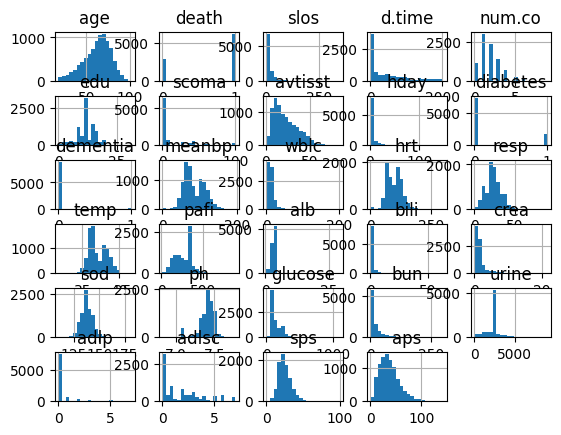

In [30]:
raw_data.hist(bins = 20)
plt.show()


<Axes: >

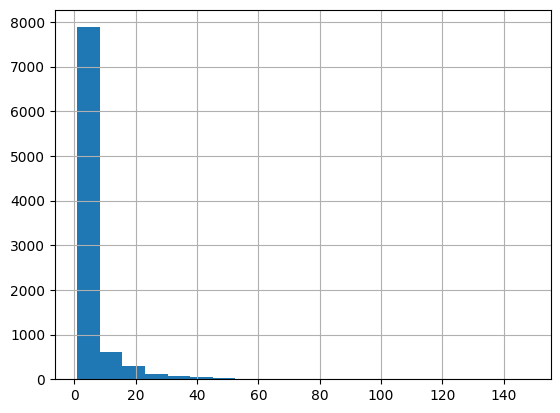

In [26]:
raw_data['hday'].hist(bins = 20)

In [11]:
import pandas as pd
pd.isna(raw_data).sum()


age         0
death       0
sex         0
slos        0
d.time      0
dzgroup     0
dzclass     0
num.co      0
edu         0
scoma       0
avtisst     0
race        0
hday        0
diabetes    0
dementia    0
ca          0
meanbp      0
wblc        0
hrt         0
resp        0
temp        0
pafi        0
alb         0
bili        0
crea        0
sod         0
ph          0
glucose     0
bun         0
urine       0
adlp        0
adlsc       0
sps         0
aps         0
dtype: int64